In [111]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [16]:
dev = qml.device('default.qubit', wires=11)

@qml.qnode(dev)
def circuit(input):
    # input state
    coeff = np.sqrt(np.ones(len(input))/len(input))
    base = np.array(input)
    qml.Superposition(coeff, base, wires=range(5), work_wire=5)
    qml.BasisState(np.array([1,0]), wires=[6,7])
    # qml.Barrier(range(11))
    
    # binary summation
    qml.CNOT([0,8])
    qml.CNOT([1,9])
    qml.CNOT([6,8])
    qml.CNOT([7,9])
    qml.PauliX(8)
    qml.PauliX(9)
    # determination 
    qml.Toffoli([8,9,10])
    
    return qml.probs([6,7,8,9])

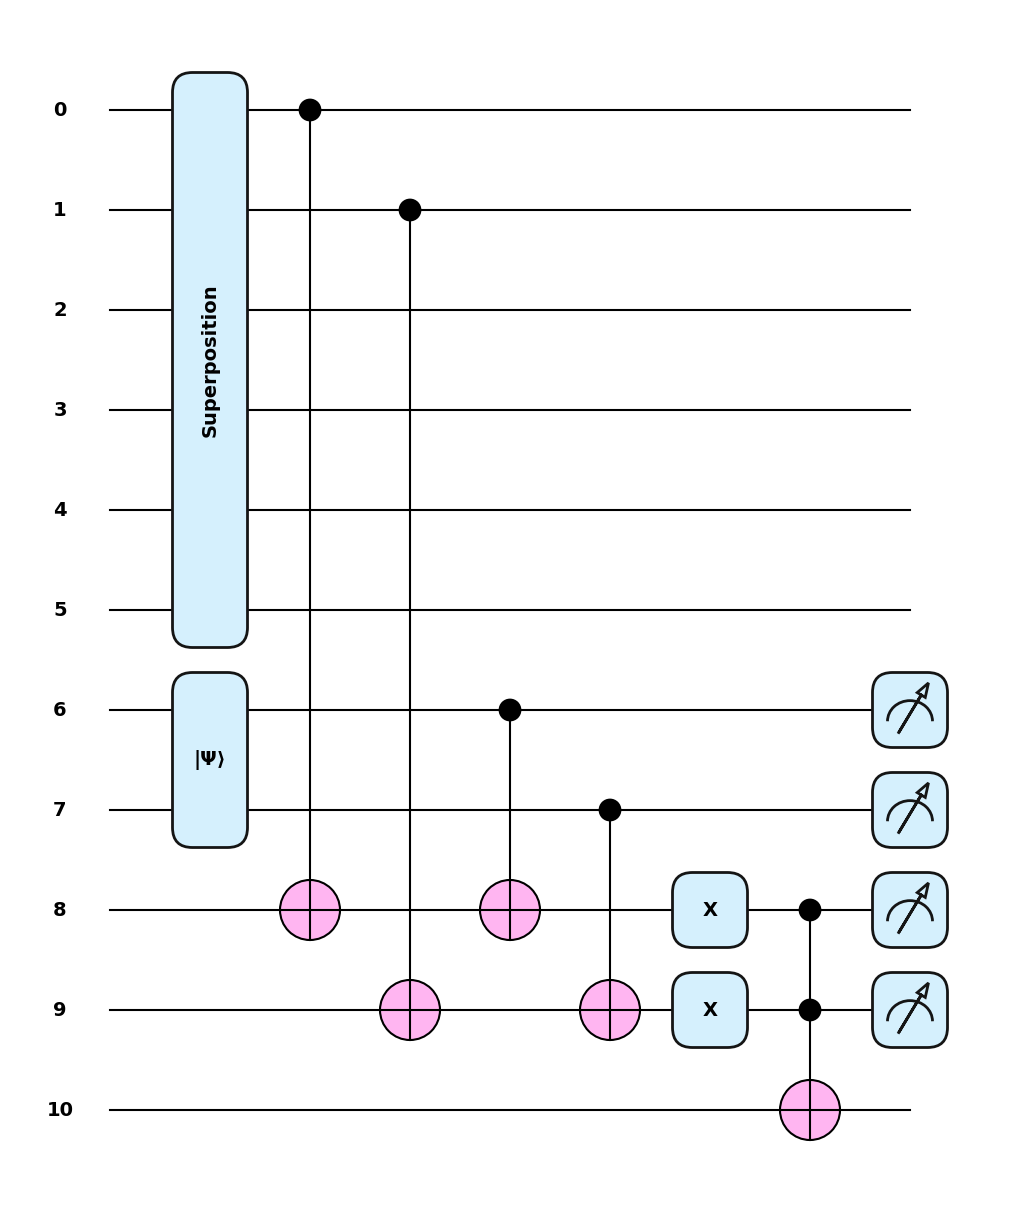

In [17]:
fig, _ = qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)([[0,0,1,1,0], [0,1,0,0,0], [1,0,0,0,1], [1,1,1,0,1]])
plt.show()

In [18]:
fig.savefig('target_comparison.png')

In [48]:
# read
dev = qml.device('default.qubit', wires=11)

@qml.qnode(dev)
def circuit(input):
    # input state
    coeff = np.sqrt(np.ones(len(input))/len(input))
    base = np.array(input)
    qml.Superposition(coeff, base, wires=range(5), work_wire=5)
    qml.BasisState(np.array([1,0]), wires=[6,7])
    # qml.Barrier(range(11))
    
    # binary summation
    qml.CNOT([0,8])
    qml.CNOT([1,9])
    qml.CNOT([6,8])
    qml.CNOT([7,9])
    qml.PauliX(8)
    qml.PauliX(9)
    # determination 
    qml.Toffoli([8,9,10])

    # measurement
    qml.Barrier(range(11))
    qml.measure(6, reset=True)
    qml.measure(7, reset=True)
    qml.measure(8, reset=True)
    qml.measure(9)

    # copy target states
    qml.Toffoli([10,2,6])
    qml.Toffoli([10,3,7])
    qml.Toffoli([10,4,8])
    
    return qml.probs([6,7,8])

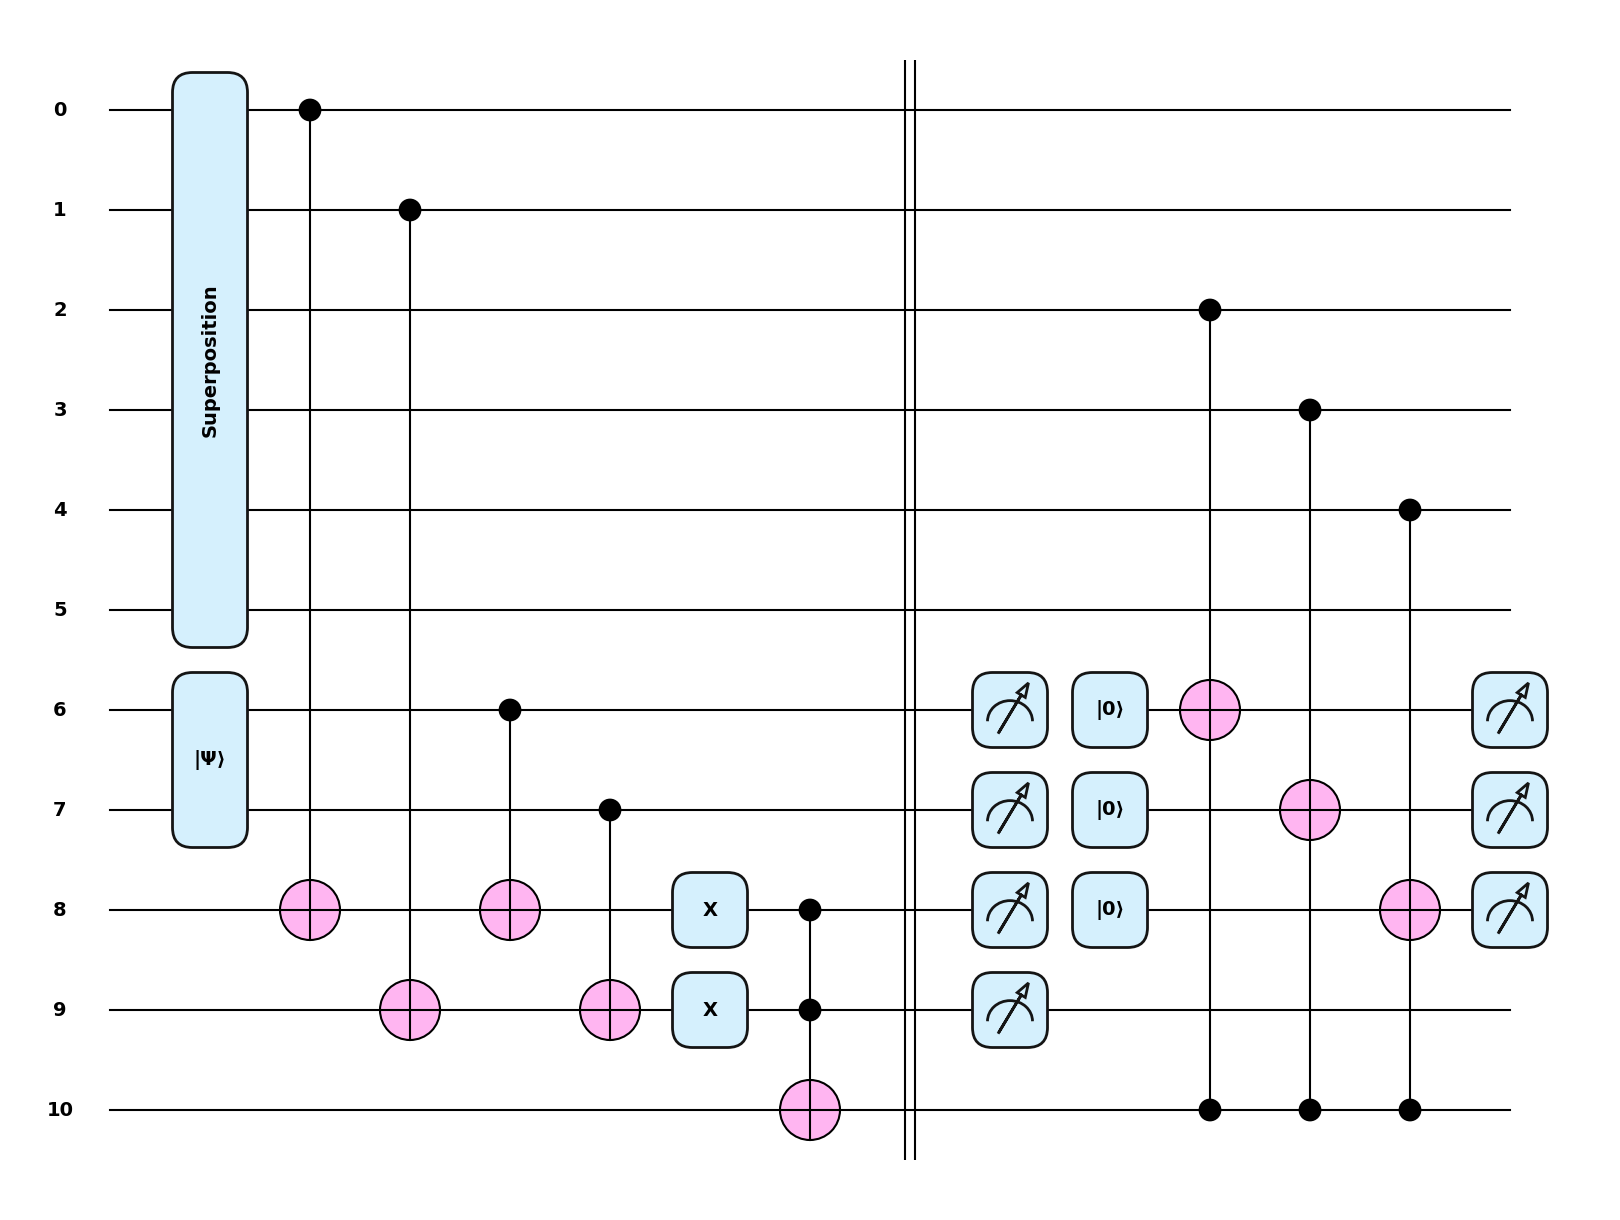

In [49]:
fig, _ = qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)([[0,0,1,1,0], [0,1,0,0,0], [1,0,0,0,1], [1,1,1,0,1]])
plt.show()

In [58]:
# read
dev = qml.device('default.qubit', wires=11)

@qml.qnode(dev)
def circuit(input):
    # input state
    coeff = np.sqrt(np.ones(len(input))/len(input))
    base = np.array(input)
    qml.Superposition(coeff, base, wires=[1,2,3,4,5], work_wire=6)
    qml.BasisState(np.array([1,0]), wires=[7,8])
    # qml.Barrier(range(11))
    
    # binary summation
    qml.CNOT([1,9])
    qml.CNOT([2,10])
    qml.CNOT([7,9])
    qml.CNOT([8,10])
    qml.PauliX(9)
    qml.PauliX(10)
    # determination 
    qml.Toffoli([10,9,0])

    # measurement
    qml.Barrier(range(11))
    qml.measure(7, reset=True)
    qml.measure(8, reset=True)
    qml.measure(9, reset=True)
    qml.measure(10)

    # copy target states
    qml.Toffoli([3,0,7])
    qml.Toffoli([4,0,8])
    qml.Toffoli([5,0,9])
    
    return qml.probs([7,8,9])

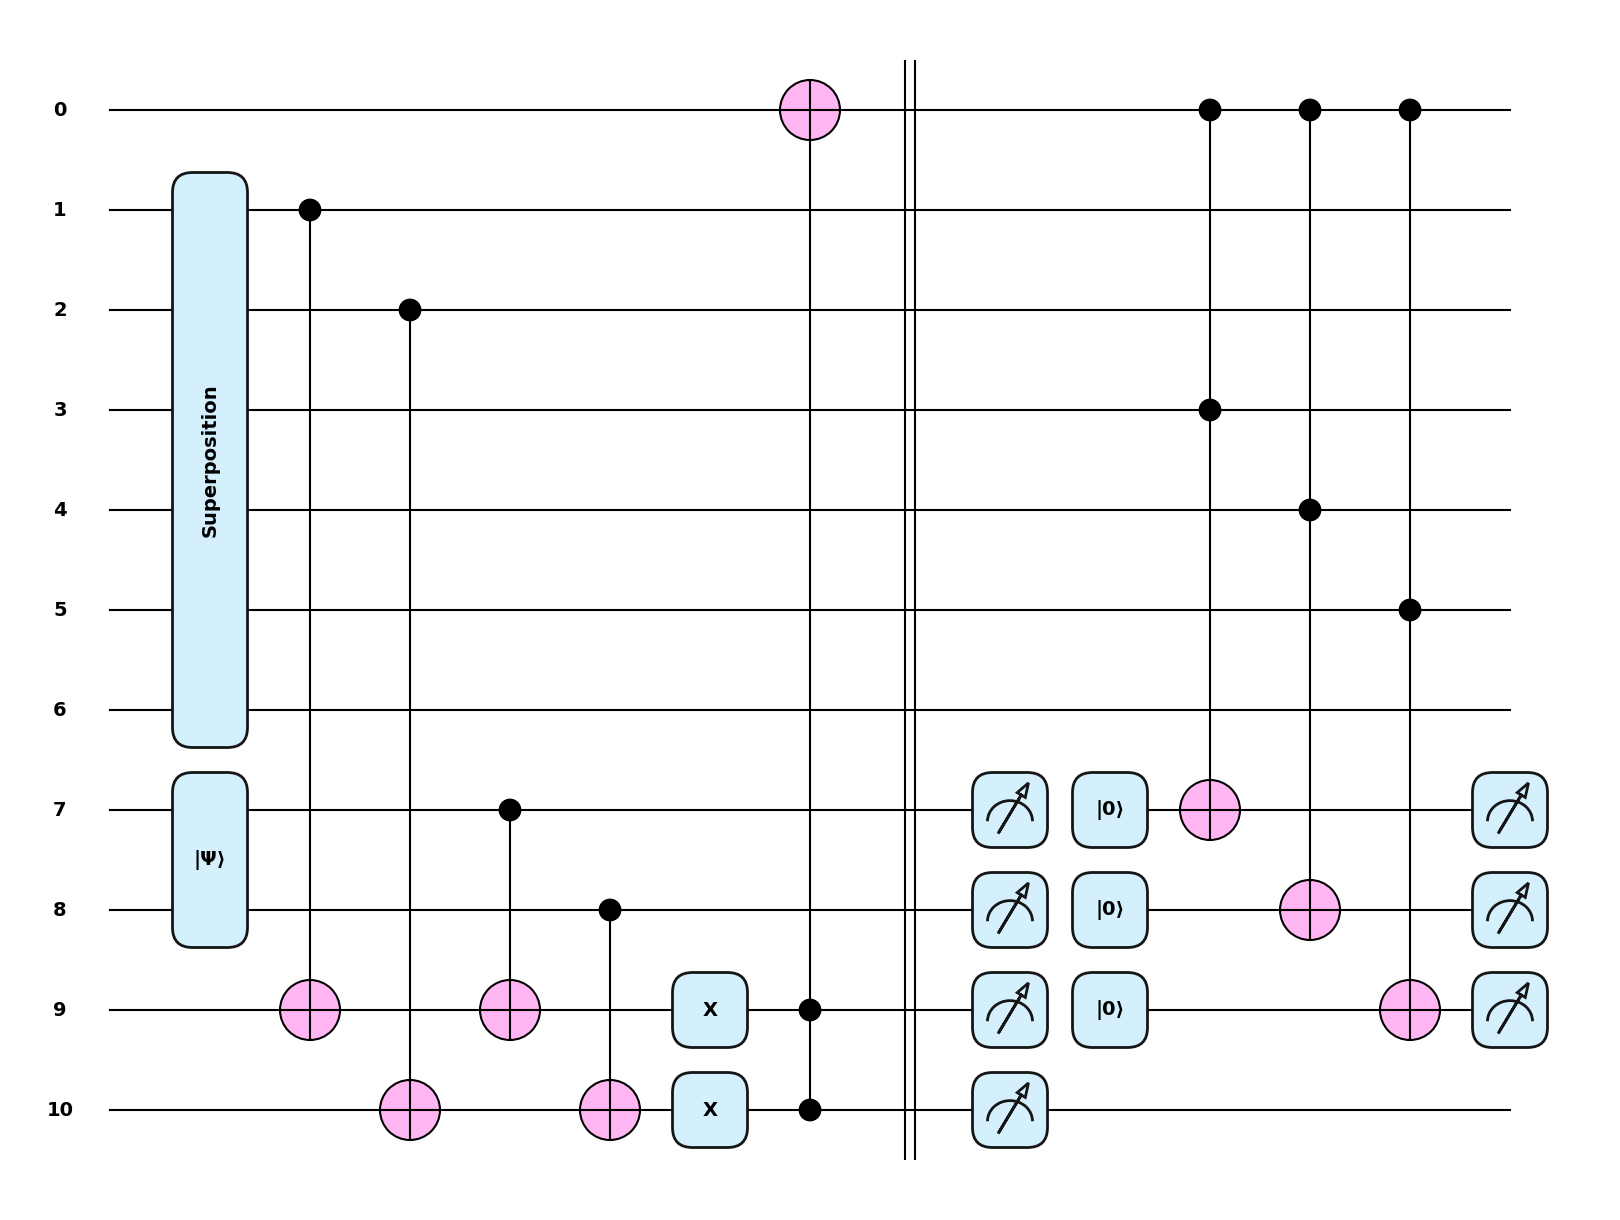

In [59]:
fig, _ = qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)([[0,0,1,1,0], [0,1,0,0,0], [1,0,0,0,1], [1,1,1,0,1]])
plt.show()

In [30]:
fig.savefig('read.png')

In [56]:
circuit([[0,0,1,1,0], [0,1,0,0,0], [1,0,0,0,1], [1,1,1,0,1]])

array([0.75, 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

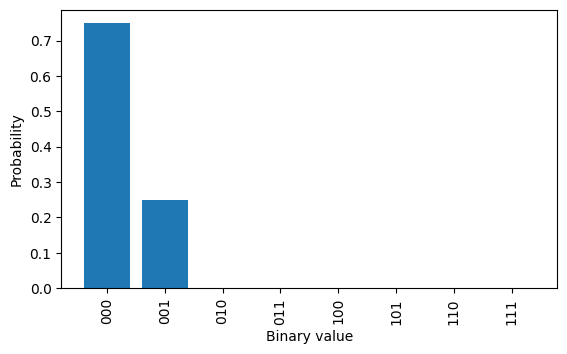

In [60]:
# probability plot
bit_strings = [f"{x:0{3}b}" for x in range(8)]
c = circuit([[0,0,1,1,0], [0,1,0,0,0], [1,0,0,0,1], [1,1,1,0,1]])

plt.bar(bit_strings, c)
plt.xlabel("Binary value")
plt.ylabel("Probability")
plt.xticks(rotation="vertical")
plt.subplots_adjust(bottom=0.3)

plt.show()

C:\Users\syj43\AppData\Local\Programs\Python\Python310\lib\site-packages\pennylane\drawer\mpldrawer.py:673: UserWarning: Some control indicators are hidden behind an operator. Consider re-ordering your circuit wires to ensure all control indicators are visible.
  warnings.warn(


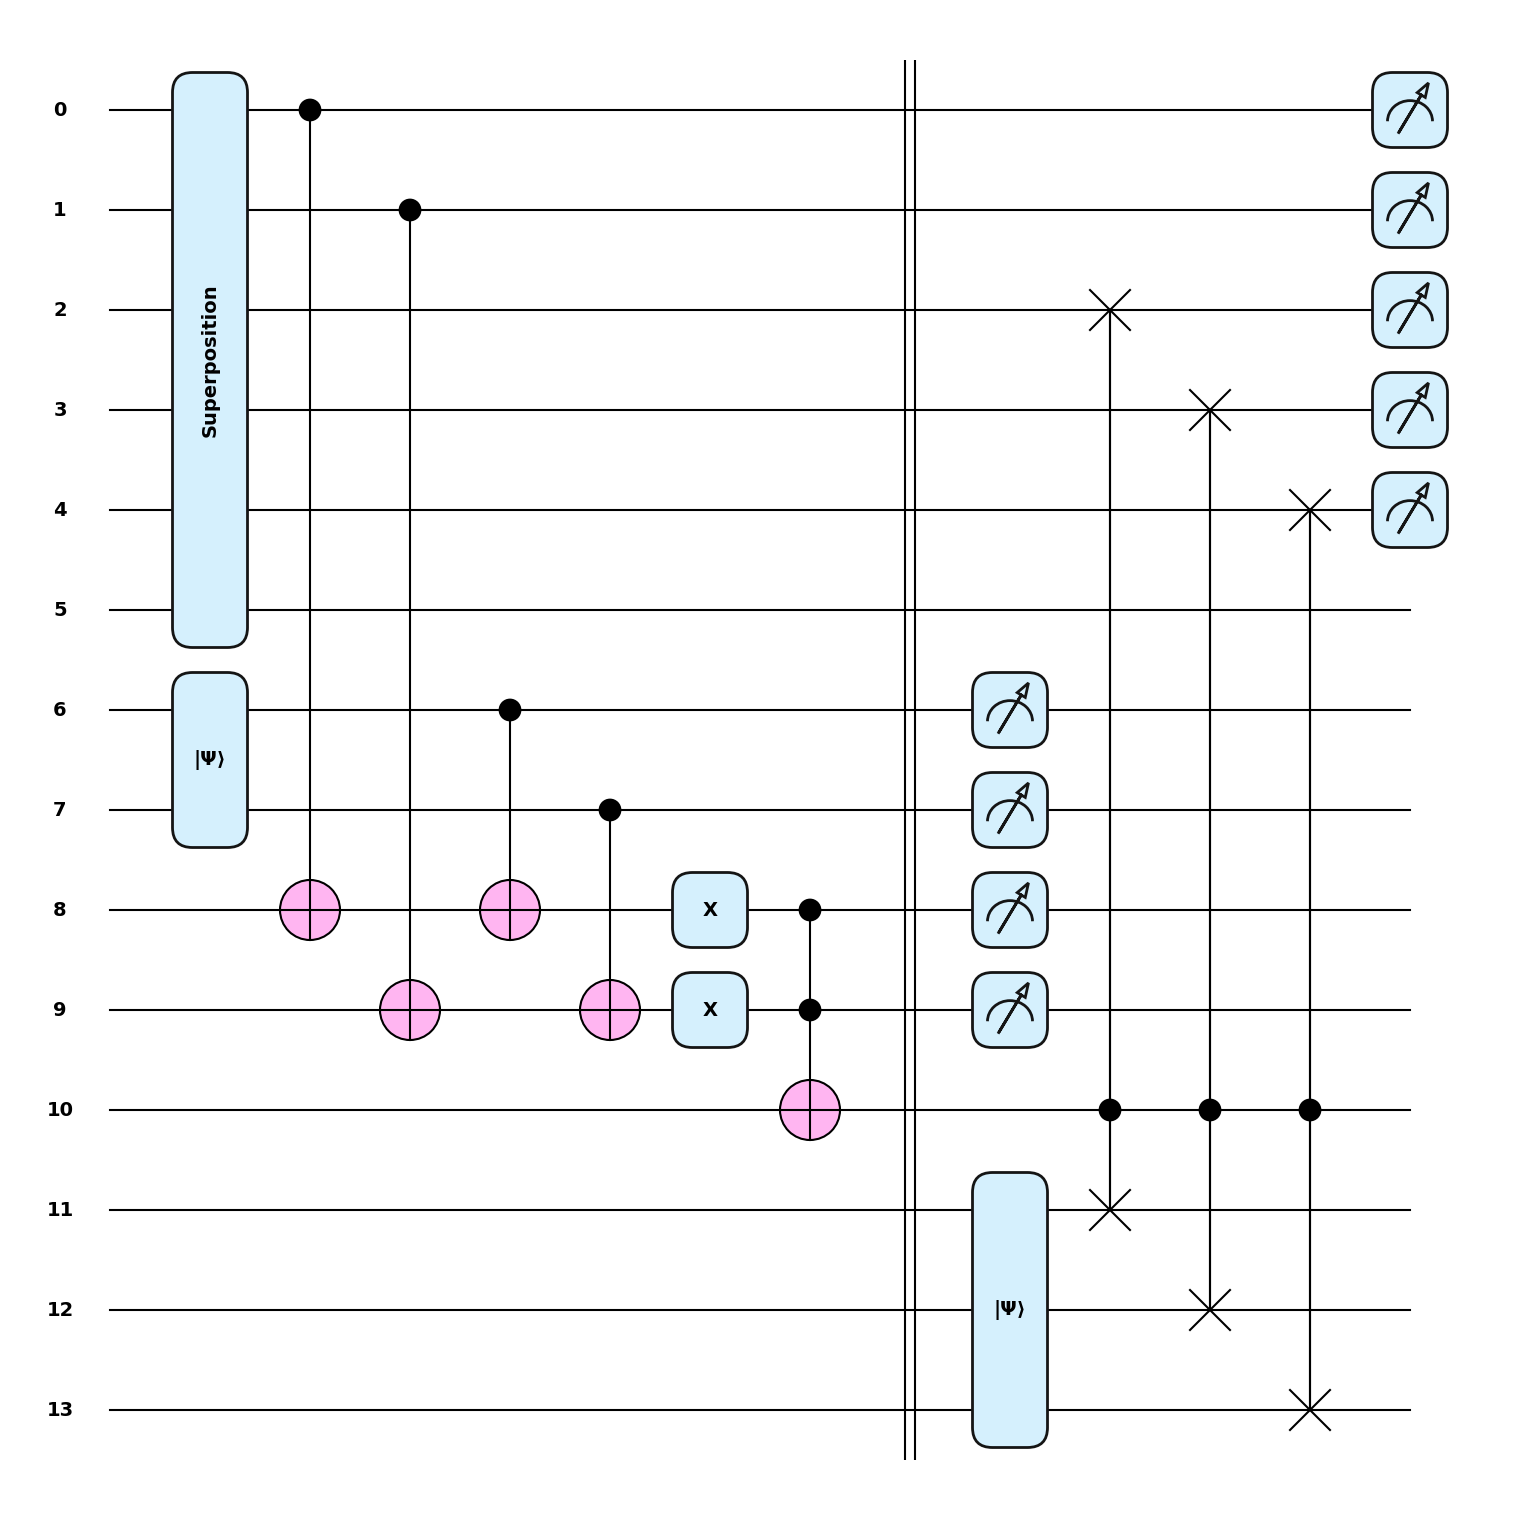

In [35]:
# read
dev = qml.device('default.qubit', wires=14)

@qml.qnode(dev)
def circuit(input):
    # input state
    coeff = np.sqrt(np.ones(len(input))/len(input))
    base = np.array(input)
    qml.Superposition(coeff, base, wires=range(5), work_wire=5)
    qml.BasisState(np.array([0,1]), wires=[6,7])
    # qml.Barrier(range(11))
    
    # binary summation
    qml.CNOT([0,8])
    qml.CNOT([1,9])
    qml.CNOT([6,8])
    qml.CNOT([7,9])
    qml.PauliX(8)
    qml.PauliX(9)
    # determination 
    qml.Toffoli([8,9,10])

    # measurement
    qml.Barrier(range(14))
    qml.measure(6)
    qml.measure(7)
    qml.measure(8)
    qml.measure(9)

    # input
    qml.BasisState(np.array([1,1,1]), wires=[11,12,13])
    
    # copy target states
    qml.CSWAP([10,2,11])
    qml.CSWAP([10,3,12])
    qml.CSWAP([10,4,13])
    
    return qml.probs(range(5))

fig, _ = qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)([[0,0,1,1,0], [0,1,0,0,0], [1,0,0,0,1], [1,1,1,0,1]])
plt.show()

In [37]:
fig.savefig('update.png')

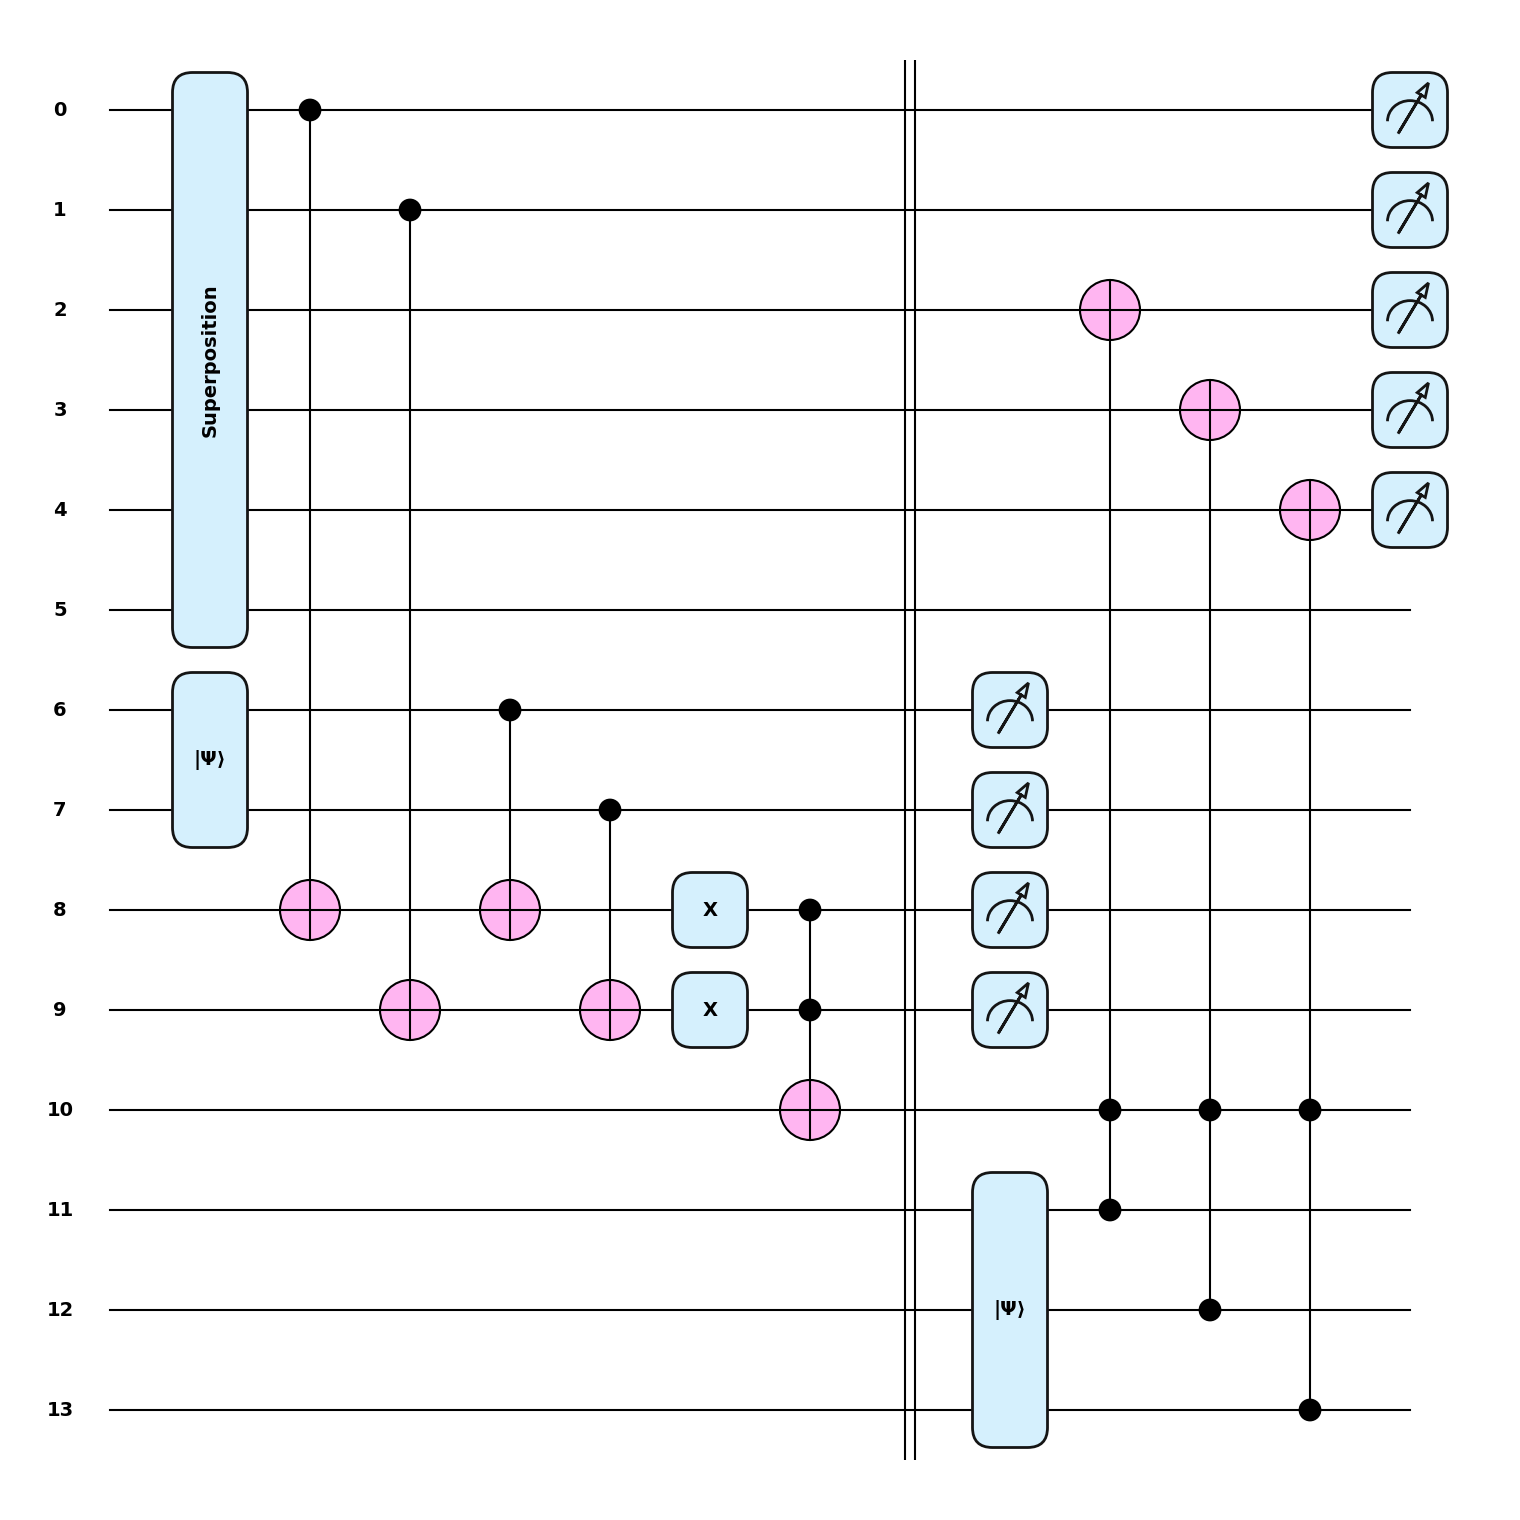

In [41]:
# write - CNOT
dev = qml.device('default.qubit', wires=14)

@qml.qnode(dev)
def circuit(input):
    # input state
    coeff = np.sqrt(np.ones(len(input))/len(input))
    base = np.array(input)
    qml.Superposition(coeff, base, wires=range(5), work_wire=5)
    qml.BasisState(np.array([0,1]), wires=[6,7])
    # qml.Barrier(range(11))
    
    # binary summation
    qml.CNOT([0,8])
    qml.CNOT([1,9])
    qml.CNOT([6,8])
    qml.CNOT([7,9])
    qml.PauliX(8)
    qml.PauliX(9)
    # determination 
    qml.Toffoli([8,9,10])

    # measurement
    qml.Barrier(range(14))
    qml.measure(6)
    qml.measure(7)
    qml.measure(8)
    qml.measure(9)

    # input
    qml.BasisState(np.array([1,1,1]), wires=[11,12,13])
    
    # copy target states
    qml.Toffoli([10,11,2])
    qml.Toffoli([10,12,3])
    qml.Toffoli([10,13,4])
    
    return qml.probs(range(5))

fig, _ = qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)([[0,0,1,1,0], [0,1,0,0,0], [1,0,0,0,1], [1,1,1,0,1]])
plt.show()

In [42]:
fig.savefig('write2.png')

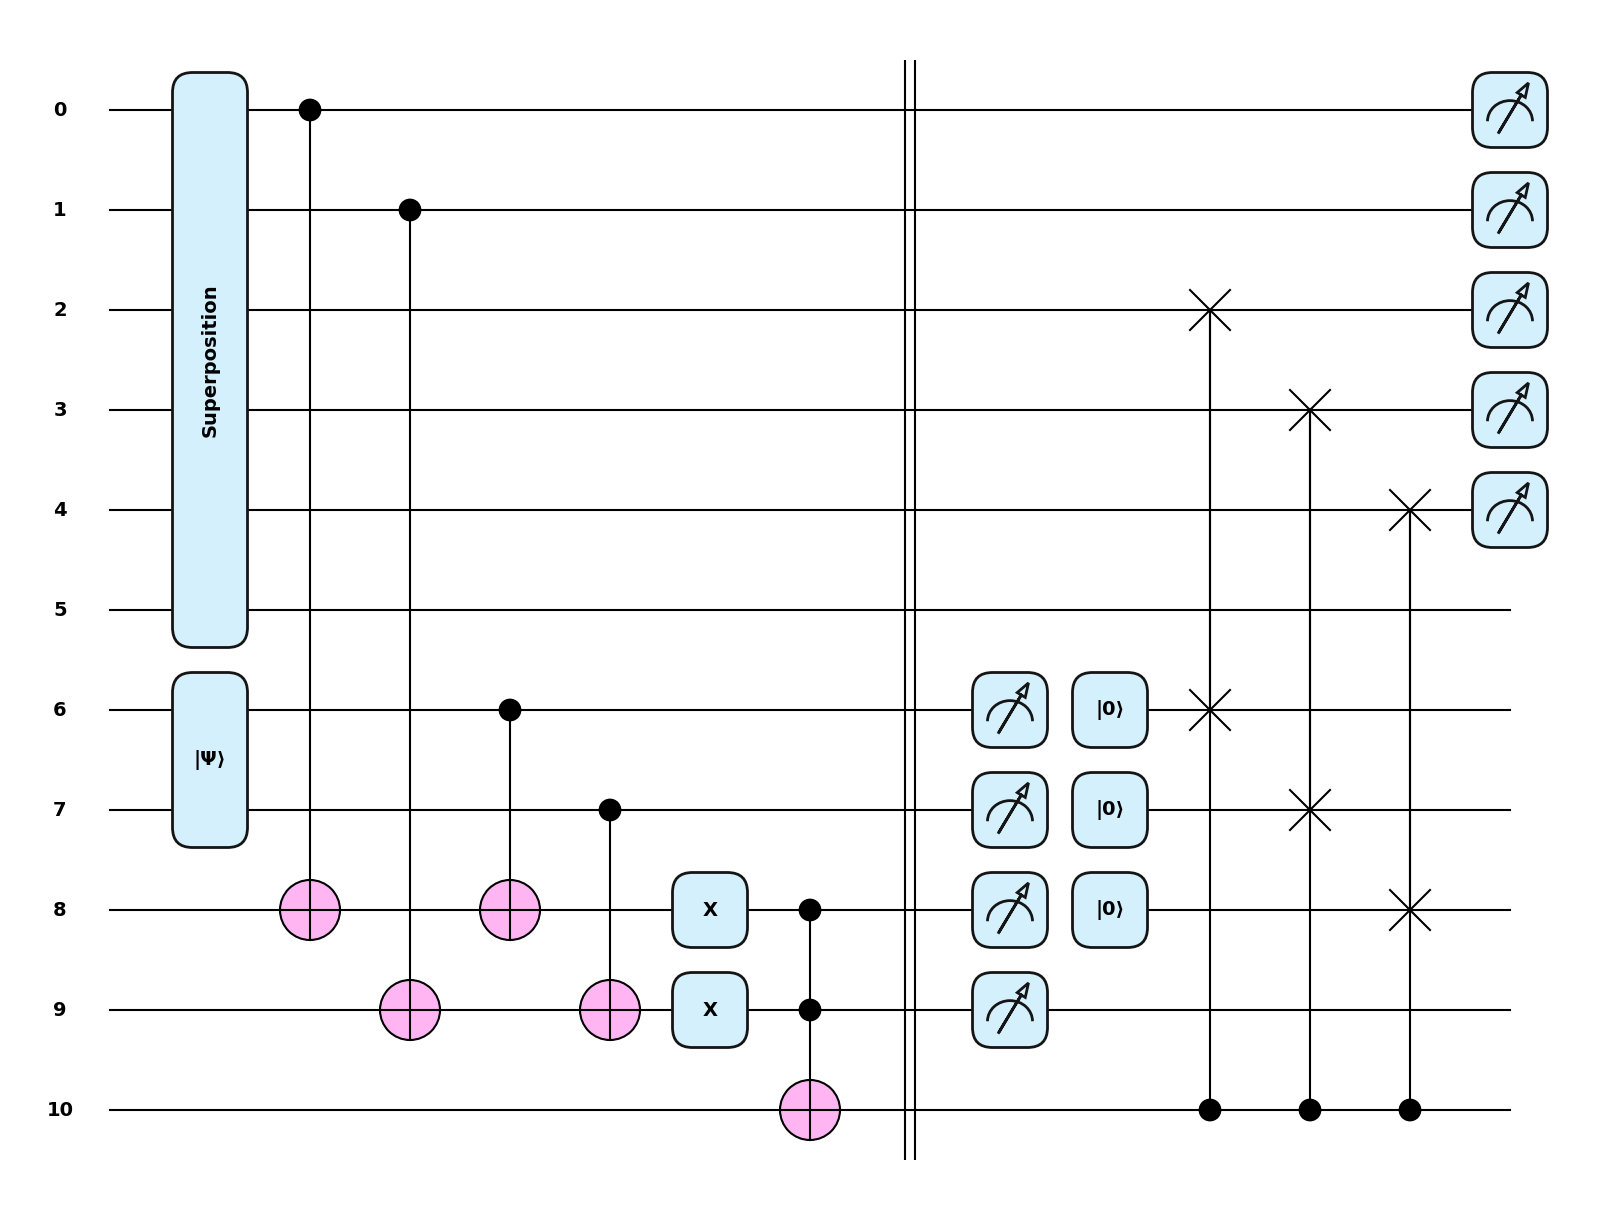

In [62]:
# read
dev = qml.device('default.qubit', wires=11)

@qml.qnode(dev)
def circuit(input):
    # input state
    coeff = np.sqrt(np.ones(len(input))/len(input))
    base = np.array(input)
    qml.Superposition(coeff, base, wires=range(5), work_wire=5)
    qml.BasisState(np.array([0,1]), wires=[6,7])
    # qml.Barrier(range(11))
    
    # binary summation
    qml.CNOT([0,8])
    qml.CNOT([1,9])
    qml.CNOT([6,8])
    qml.CNOT([7,9])
    qml.PauliX(8)
    qml.PauliX(9)
    # determination 
    qml.Toffoli([8,9,10])

    # measurement
    qml.Barrier(range(11))
    qml.measure(6, reset=True)
    qml.measure(7, reset=True)
    qml.measure(8, reset=True)
    qml.measure(9)

    # input
    # qml.BasisState(np.array([1,1,1]), wires=[11,12,13])
    
    # copy target states
    qml.CSWAP([10,2,6])
    qml.CSWAP([10,3,7])
    qml.CSWAP([10,4,8])
    
    return qml.probs(range(5))

fig, _ = qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)([[0,0,1,1,0], [0,1,0,0,0], [1,0,0,0,1], [1,1,1,0,1]])
plt.show()

In [63]:
fig.savefig('delete.png')

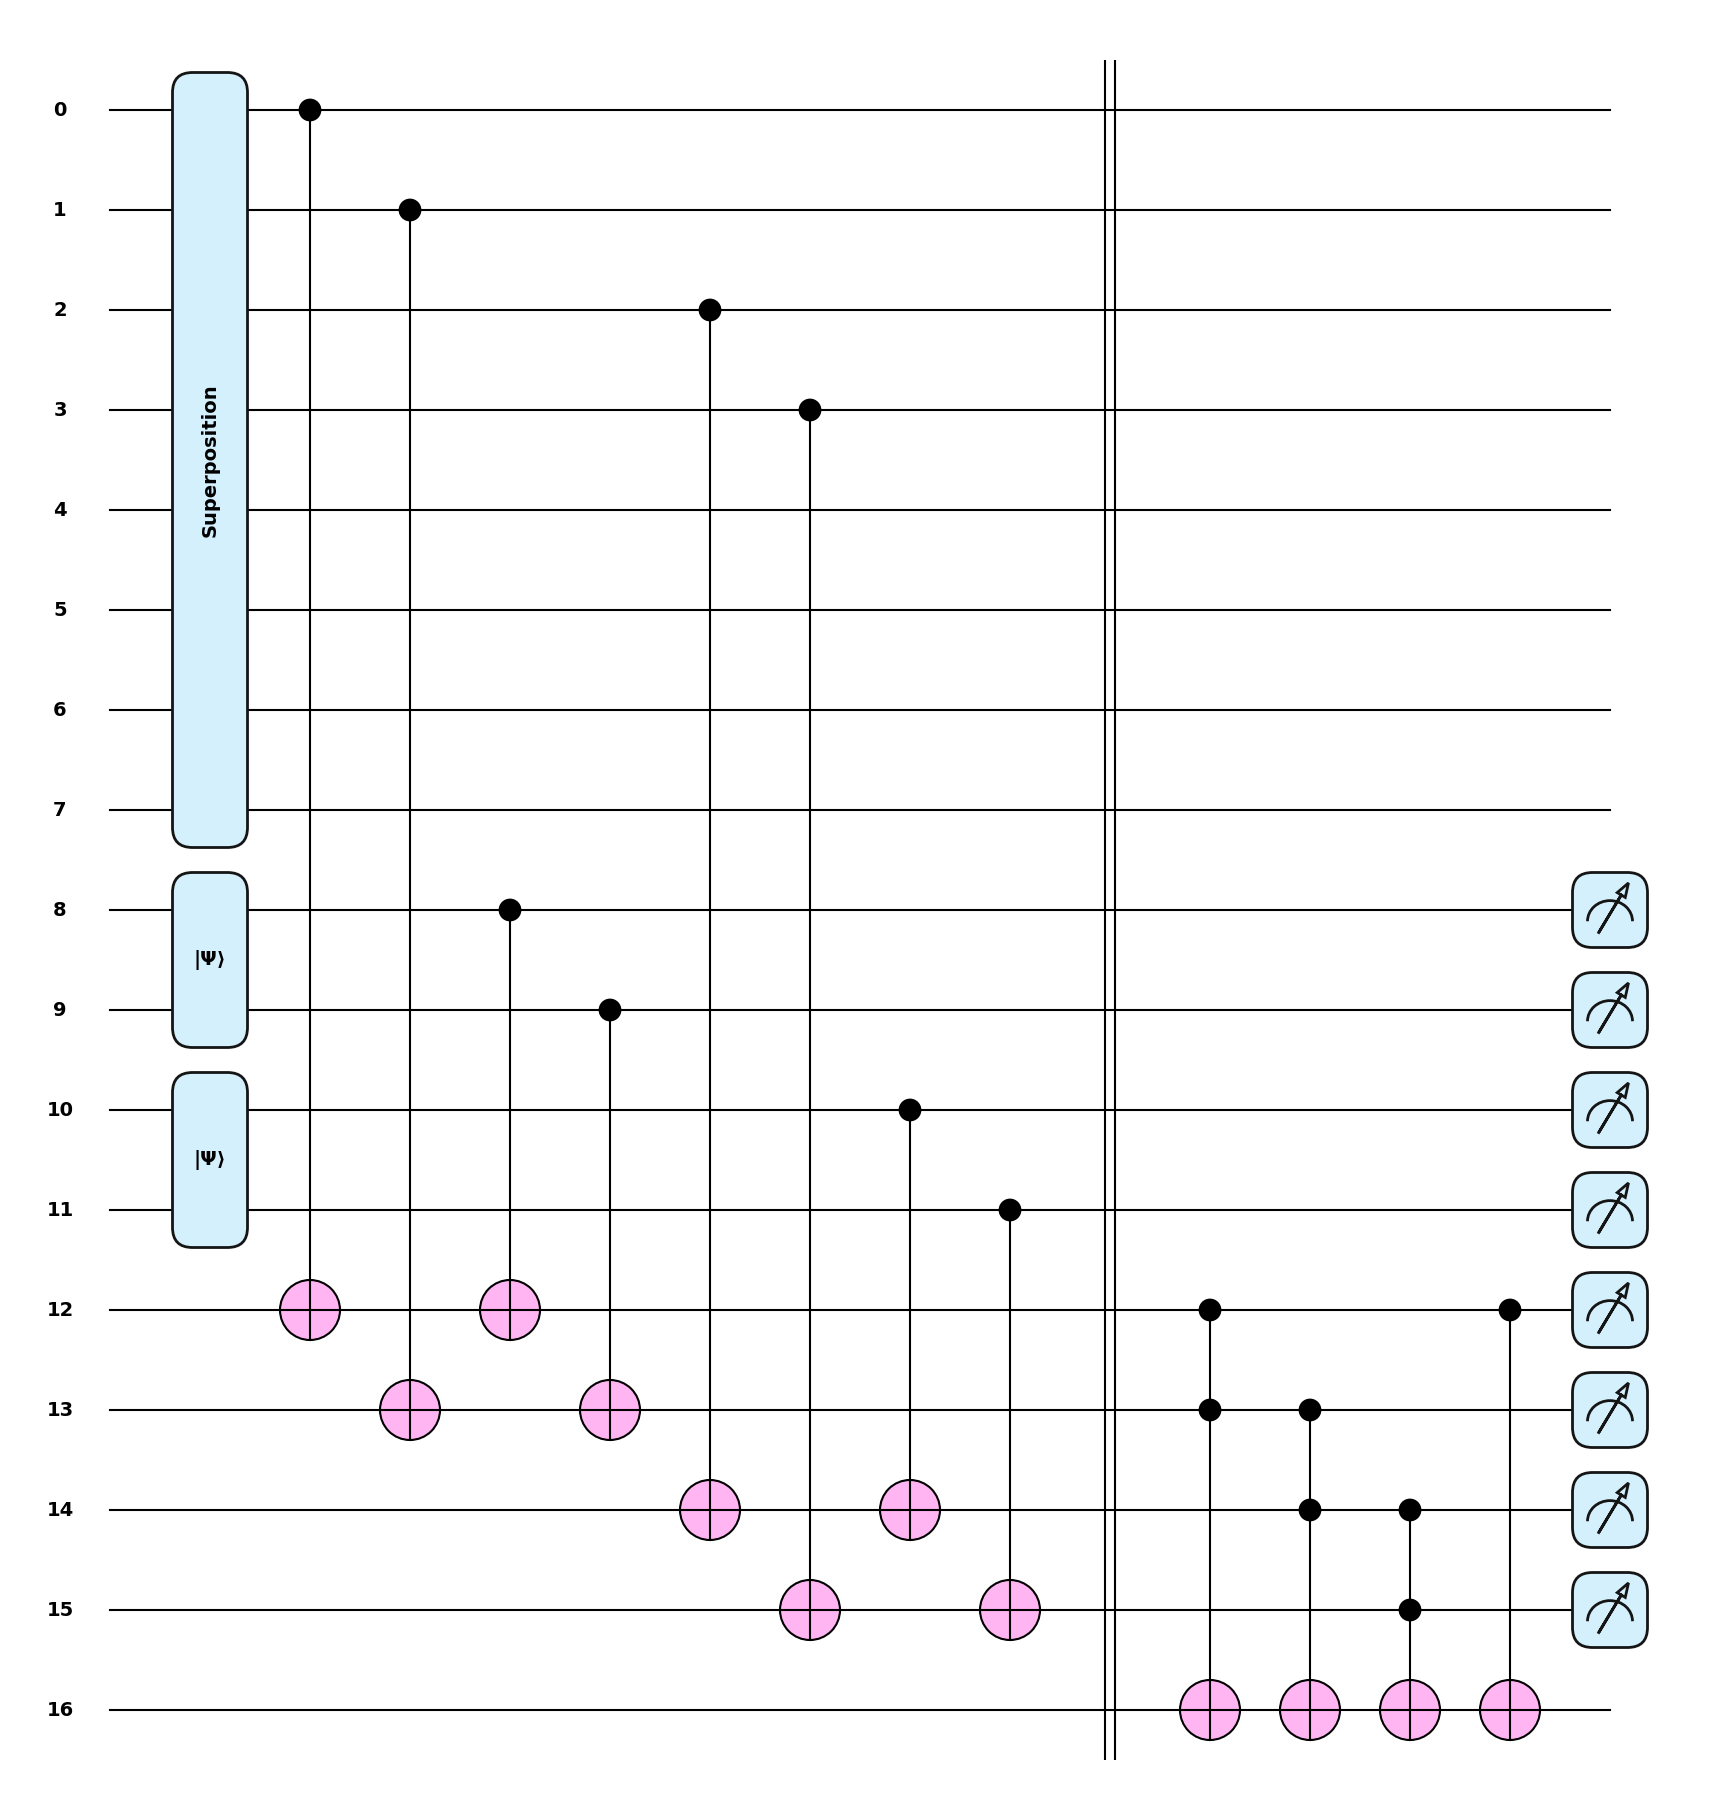

In [66]:
# read
dev = qml.device('default.qubit', wires=17)

@qml.qnode(dev)
def circuit(input):
    # input state
    coeff = np.sqrt(np.ones(len(input))/len(input))
    base = np.array(input)
    qml.Superposition(coeff, base, wires=range(7), work_wire=7)
    qml.BasisState(np.array([0,1]), wires=[8,9])
    qml.BasisState(np.array([1,1]), wires=[10,11])
    
    # binary summation
    qml.CNOT([0,12])
    qml.CNOT([1,13])
    qml.CNOT([8,12])
    qml.CNOT([9,13])

    qml.CNOT([2,14])
    qml.CNOT([3,15])
    qml.CNOT([10,14])
    qml.CNOT([11,15])
    
    # determination 
    qml.Barrier(range(17))
    qml.Toffoli([12,13,16])
    qml.Toffoli([13,14,16])
    qml.Toffoli([14,15,16])
    qml.CNOT([12,16])
    
    return qml.probs(np.arange(8,16,1))

fig, _ = qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)([[0,0,0,0,1,1,0], [0,1,0,1,0,0,0], [1,0,1,0,0,0,1], [1,1,1,1,1,0,1]])
plt.show()

In [67]:
fig.savefig('determinator_2d.png')

In [68]:
x = 8
k = 5
mod = 15

x_wires =[0,1,2,3]
work_wires=[4,5]

dev = qml.device("default.qubit", shots=1)
@qml.qnode(dev)
def circuit():
    qml.BasisEmbedding(x, wires=x_wires)
    qml.Adder(k, x_wires, mod, work_wires)
    return qml.sample(wires=x_wires)

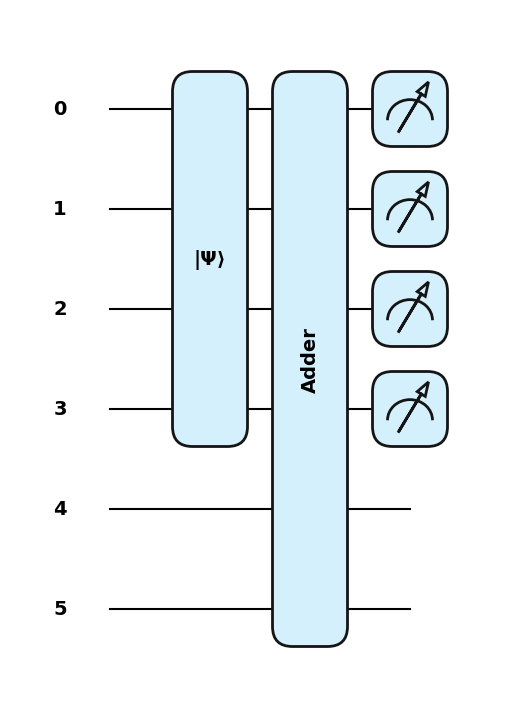

In [69]:
fig, _ = qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)()
plt.show()

C:\Users\syj43\AppData\Local\Programs\Python\Python310\lib\site-packages\pennylane\drawer\mpldrawer.py:673: UserWarning: Some control indicators are hidden behind an operator. Consider re-ordering your circuit wires to ensure all control indicators are visible.
  warnings.warn(


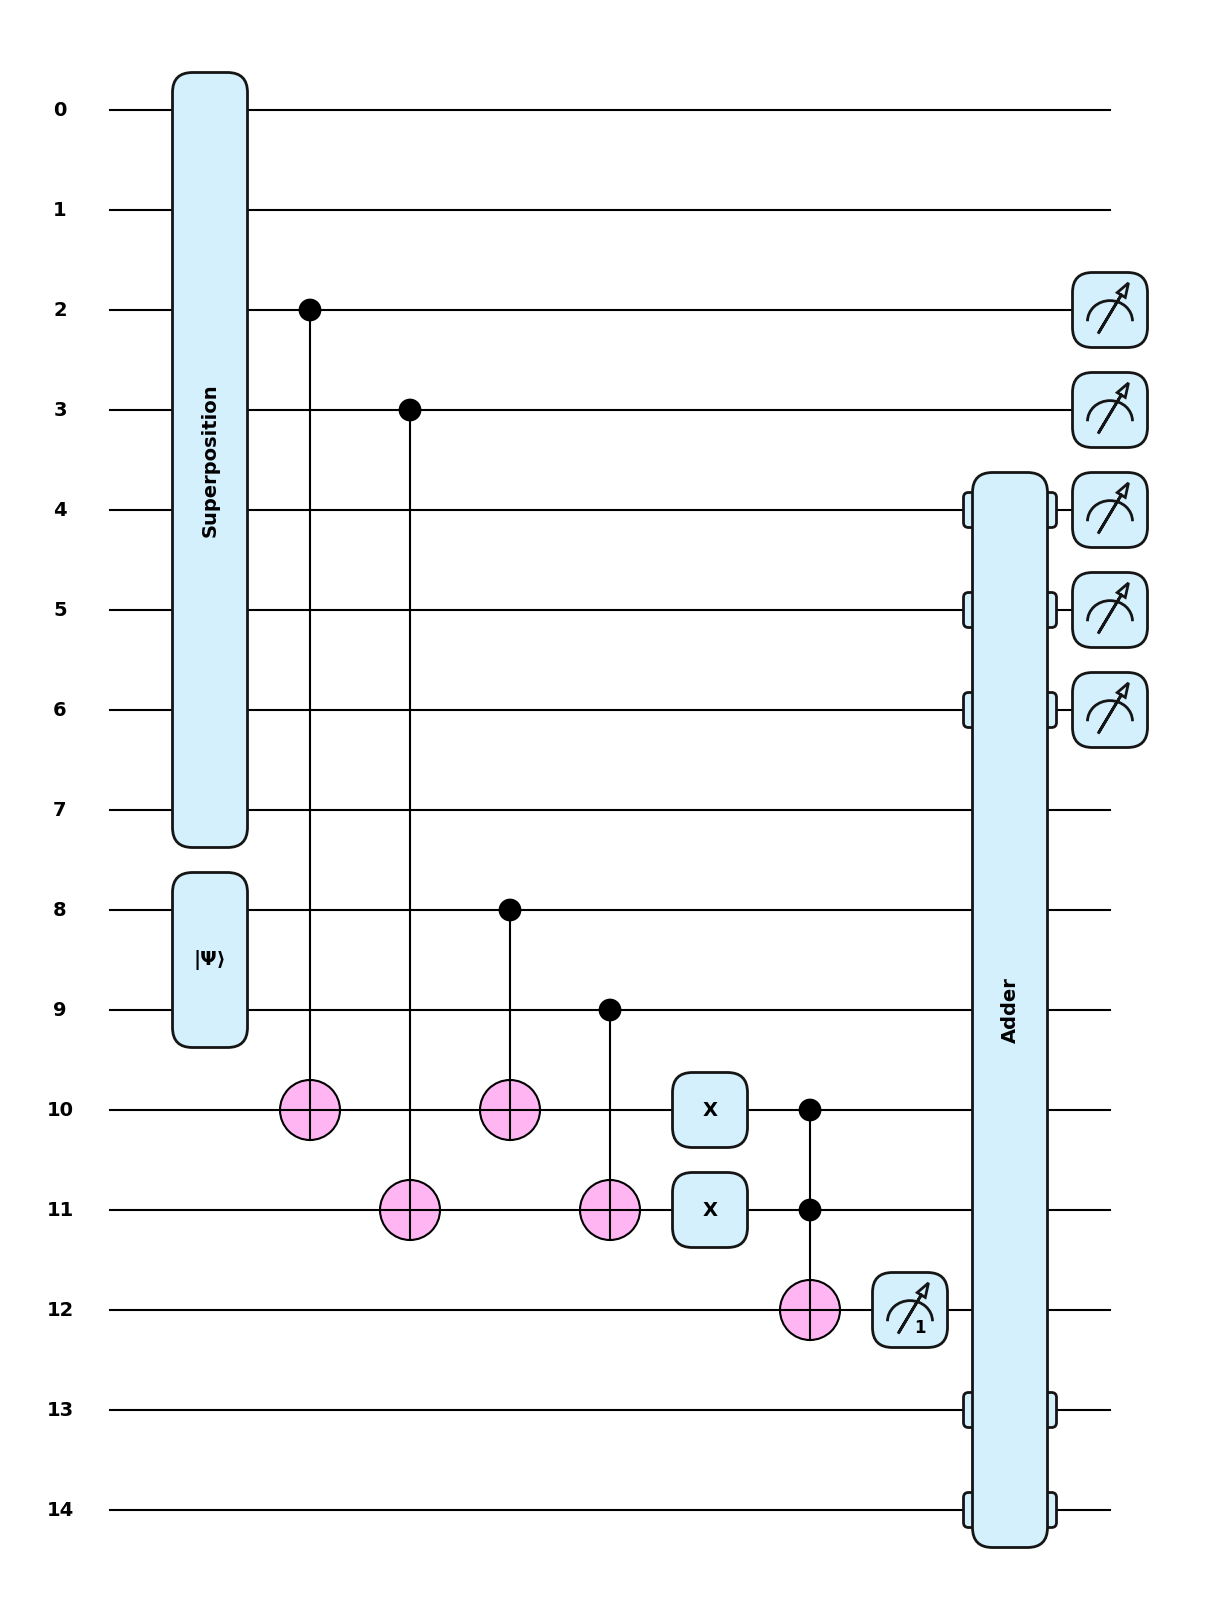

In [99]:
# read
dev = qml.device('default.qubit', wires=15)

@qml.qnode(dev)
def circuit(input):
    # input state
    coeff = np.sqrt(np.ones(len(input))/len(input))
    base = np.array(input)
    qml.Superposition(coeff, base, wires=range(7), work_wire=7)
    qml.BasisState(np.array([0,0]), wires=[8,9])
    
    # binary summation
    qml.CNOT([2,10])
    qml.CNOT([3,11])
    qml.CNOT([8,10])
    qml.CNOT([9,11])
    qml.PauliX(10)
    qml.PauliX(11)
    qml.Toffoli([10,11,12])

    # check state
    qml.measure(12, postselect=1)
    
    # determination
    qml.ctrl(qml.Adder(3, [4,5,6], mod=2, work_wires=[13,14]), control=12)
   
    return qml.probs(np.arange(2,7,1))

qm = [[0,0,0,0,1,0,0],[0,0,0,1,0,0,1],[0,0,1,0,0,0,0],[0,0,1,1,0,1,0],
     [0,1,0,0,0,1,1], [0,1,0,1,1,0,1],[0,1,1,0,0,1,0],[0,1,1,1,0,0,1],
     [1,0,0,0,0,0,0],[1,0,0,1,0,0,1],[1,0,1,0,0,1,1],[1,0,1,1,1,0,0],
     [1,1,0,0,0,1,0],[1,1,0,1,0,0,0],[1,1,1,0,1,0,0],[1,1,1,1,0,1,1]]

fig, _ = qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)(qm)
plt.show()

In [78]:
fig.savefig('adder.png')

In [82]:
len(circuit(qm))

32

['00000', '00001', '00010', '00011', '00100', '00101', '00110', '00111']
[1.85736767384763e-33, 0.125, 0.0625, 0.0625, 6.620421490957486e-34, 4.696240639815944e-33, 1.0017973087694614e-33, 1.8656191647398317e-33]


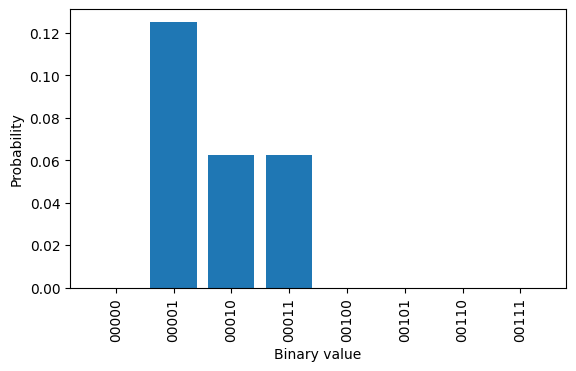

In [98]:
# probability plot
bit_strings = [f"{x:0{5}b}" for x in range(32)]
# indices = [i for i in range(32) if f"{i:05b}".endswith("00")]
c = circuit(qm)

x=[]
y=[]
for i in range(8):
    x.append(bit_strings[i])
    y.append(c[i])

print(x)
print(y)
plt.bar(x,y)
plt.xlabel("Binary value")
plt.ylabel("Probability")
plt.xticks(rotation="vertical")
plt.subplots_adjust(bottom=0.3)

plt.show()

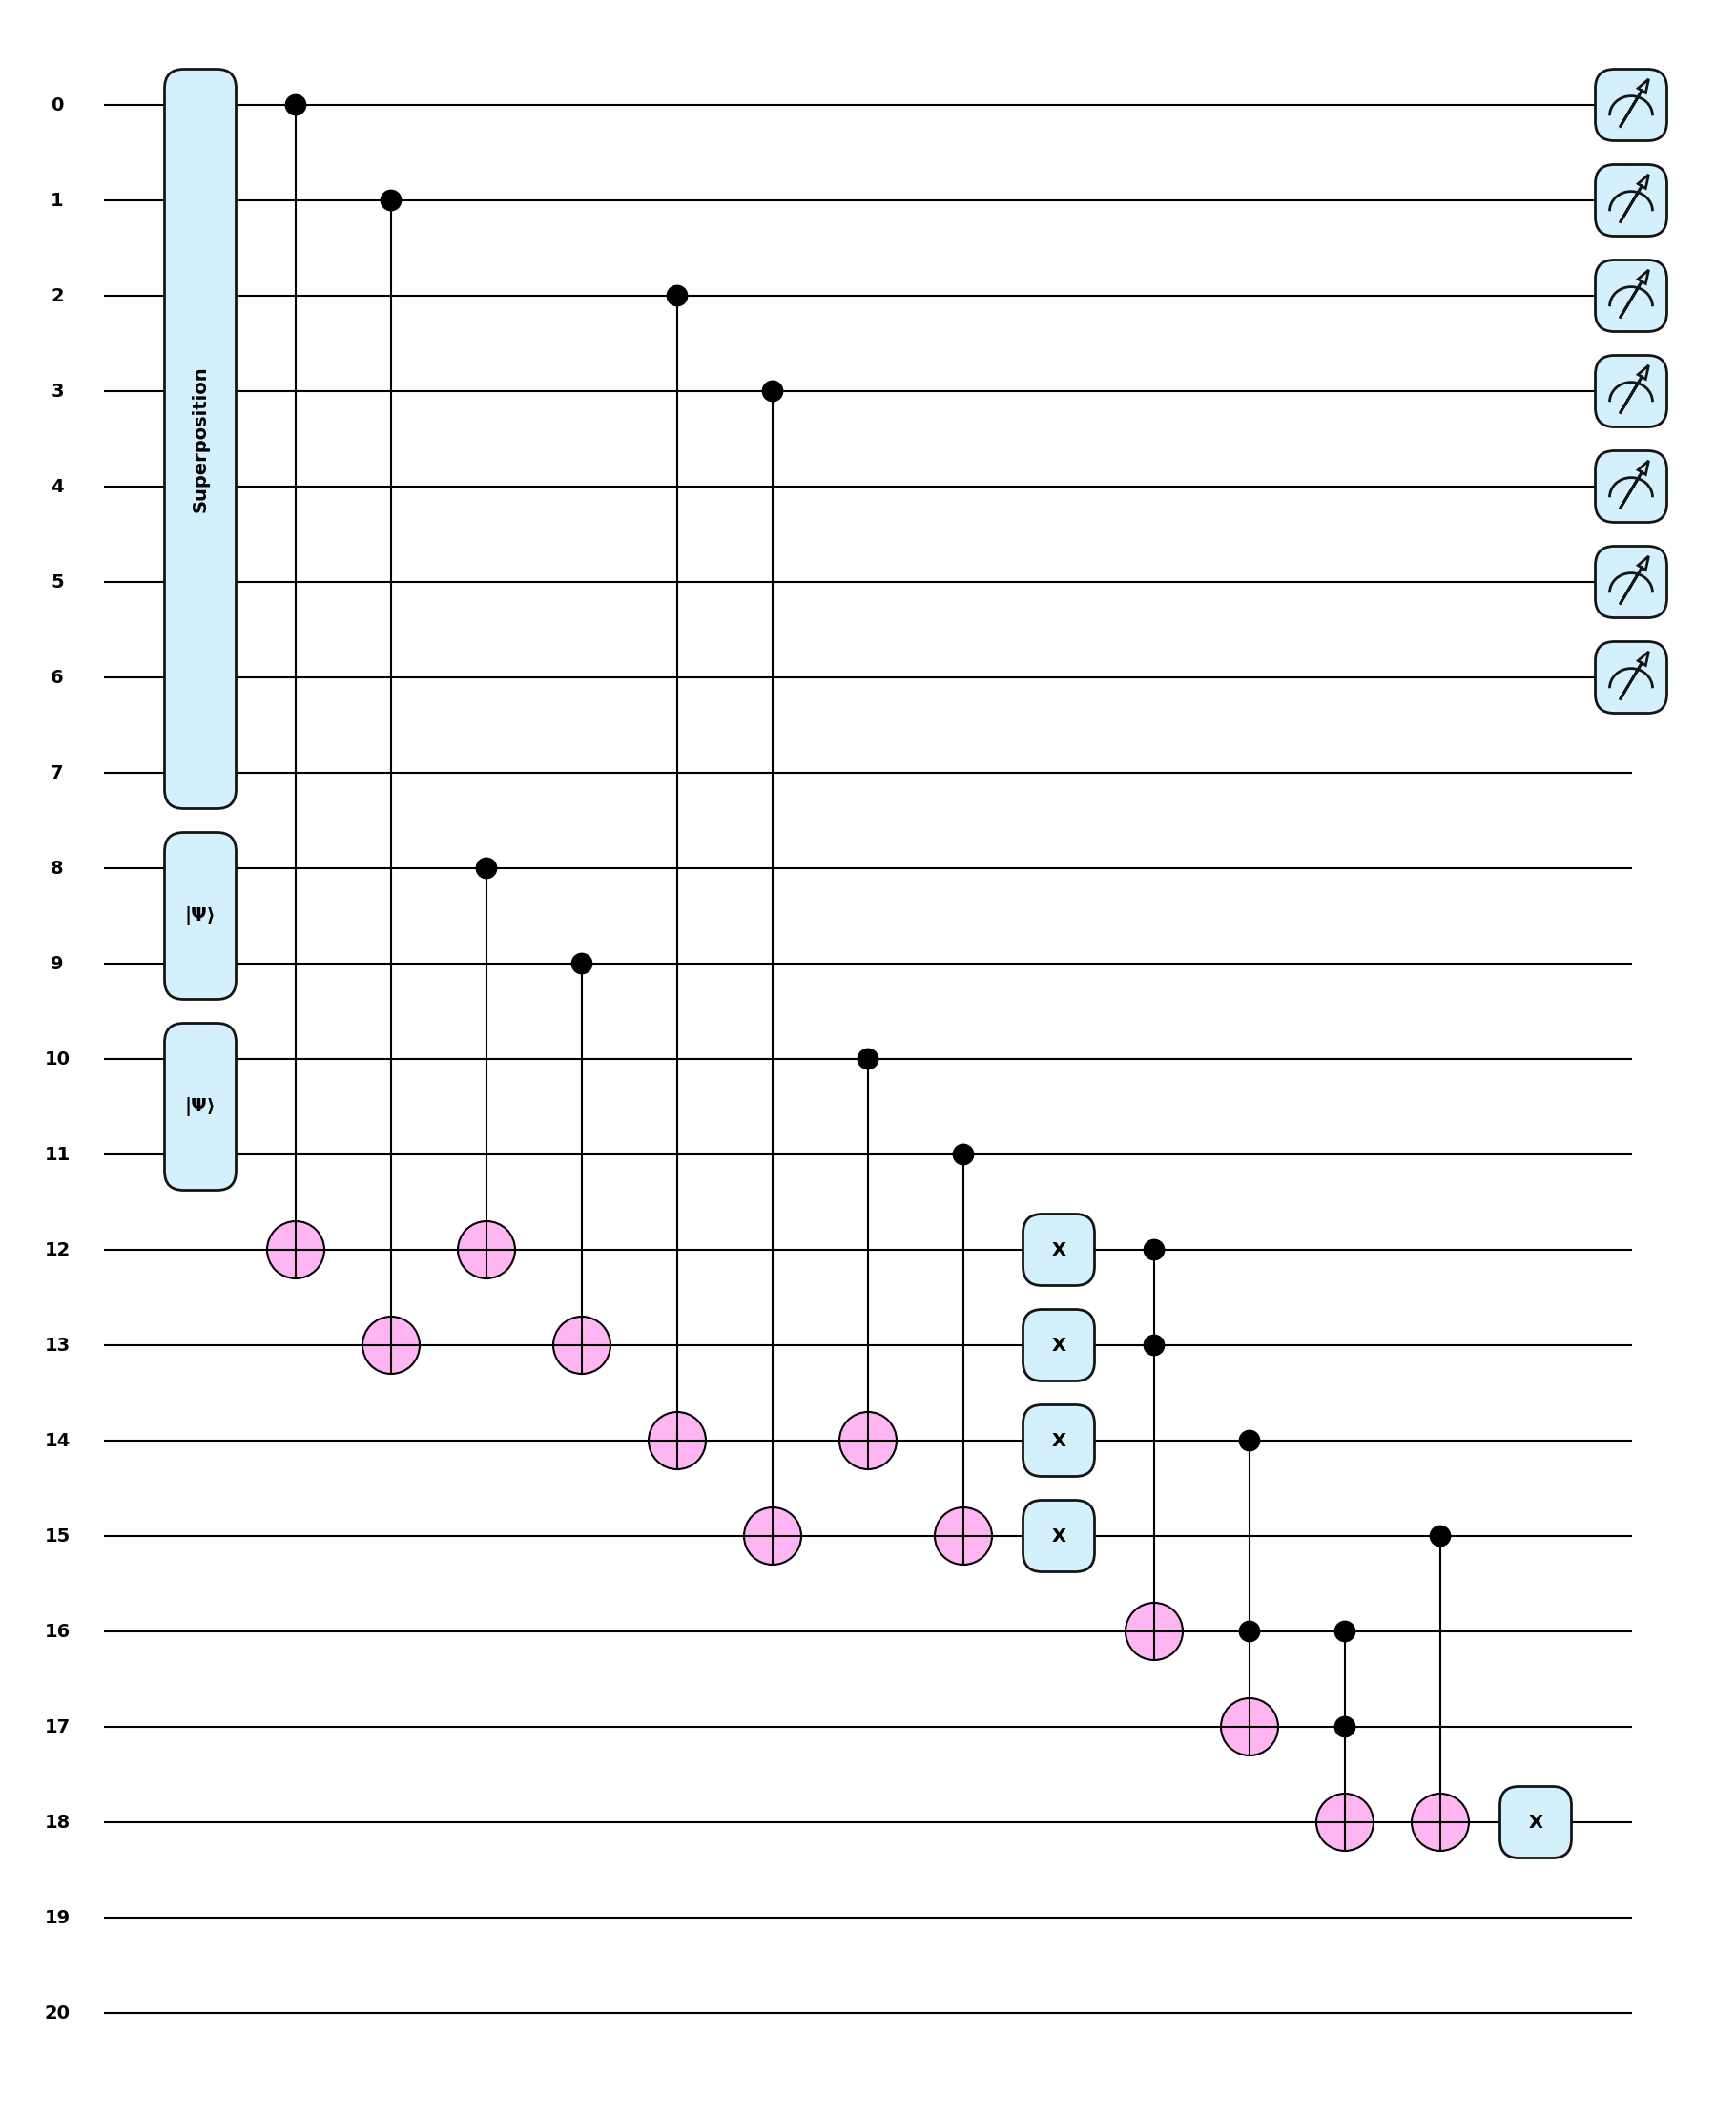

In [152]:
# read
dev = qml.device('default.qubit', wires=21)

@qml.qnode(dev)
def circuit(input):
    # input state
    coeff = np.sqrt(np.ones(len(input))/len(input))
    base = np.array(input)
    qml.Superposition(coeff, base, wires=range(7), work_wire=7)
    qml.BasisState(np.array([1,0]), wires=[8,9])
    qml.BasisState(np.array([0,1]), wires=[10,11])
    
    # binary summation
    qml.CNOT([0,12])
    qml.CNOT([1,13])
    qml.CNOT([8,12])
    qml.CNOT([9,13])

    qml.CNOT([2,14])
    qml.CNOT([3,15])
    qml.CNOT([10,14])
    qml.CNOT([11,15])

    qml.PauliX(12)
    qml.PauliX(13)
    qml.PauliX(14)
    qml.PauliX(15)
    
    # determination 
    qml.Toffoli([12,13,16])
    qml.Toffoli([14,16,17])
    qml.Toffoli([16,17,18])
    qml.CNOT([15,18])
    qml.PauliX(18)

    # qml.measure(18, postselect=1)
    # qml.Barrier(range(21))
    # qml.ctrl(qml.Adder(1, [4,5,6], mod=2, work_wires=[19,20]), control=18)
    # qml.ctrl(qml.PauliX(4), control=18)
    
    return qml.probs(range(7))

# qm = [[0,0,0,0,1,0,0],[0,0,0,1,0,0,1],[0,0,1,0,0,0,0],[0,0,1,1,0,1,0],
#      [0,1,0,0,0,1,1], [0,1,0,1,1,0,1],[0,1,1,0,0,1,0],[0,1,1,1,0,0,1],
#      [1,0,0,0,0,0,0],[1,0,0,1,0,0,1],[1,0,1,0,0,1,1],[1,0,1,1,1,0,0],
#      [1,1,0,0,0,1,0],[1,1,0,1,0,0,0],[1,1,1,0,1,0,0],[1,1,1,1,0,1,1]]

qm = [[0,0,0,0,0,0,0],[0,0,0,1,0,0,0],[0,0,1,0,0,0,0],[0,0,1,1,0,0,0],
     [0,1,0,0,0,0,0], [0,1,0,1,0,0,0],[0,1,1,0,0,0,0],[0,1,1,1,0,0,0],
     [1,0,0,0,0,0,0],[1,0,0,1,0,0,0],[1,0,1,0,0,0,0],[1,0,1,1,0,0,0],
     [1,1,0,0,0,0,0],[1,1,0,1,0,0,0],[1,1,1,0,0,0,0],[1,1,1,1,0,0,0]]

fig, _ = qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)(qm)
plt.show()

In [153]:
fig.savefig('extended_2d.png')

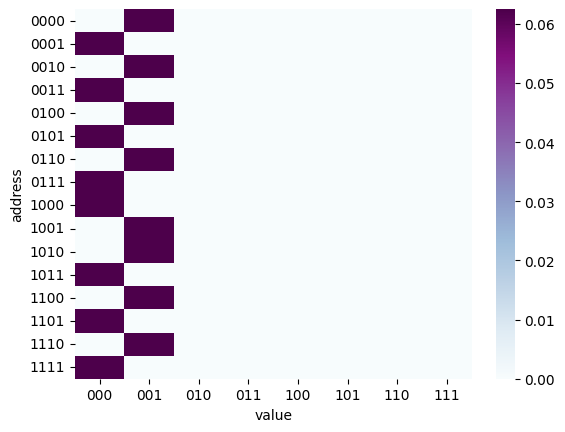

In [150]:
df = pd.DataFrame(circuit(qm).reshape(16,-1))
df['address'] = [f"{x:0{4}b}" for x in range(16)]
df = df.set_index('address')
df = df.rename(columns=dict(zip(range(8),[f"{x:0{3}b}" for x in range(8)])))
sns.heatmap(df, cmap='BuPu')
plt.xlabel('value')
plt.savefig('matrix')
plt.show()

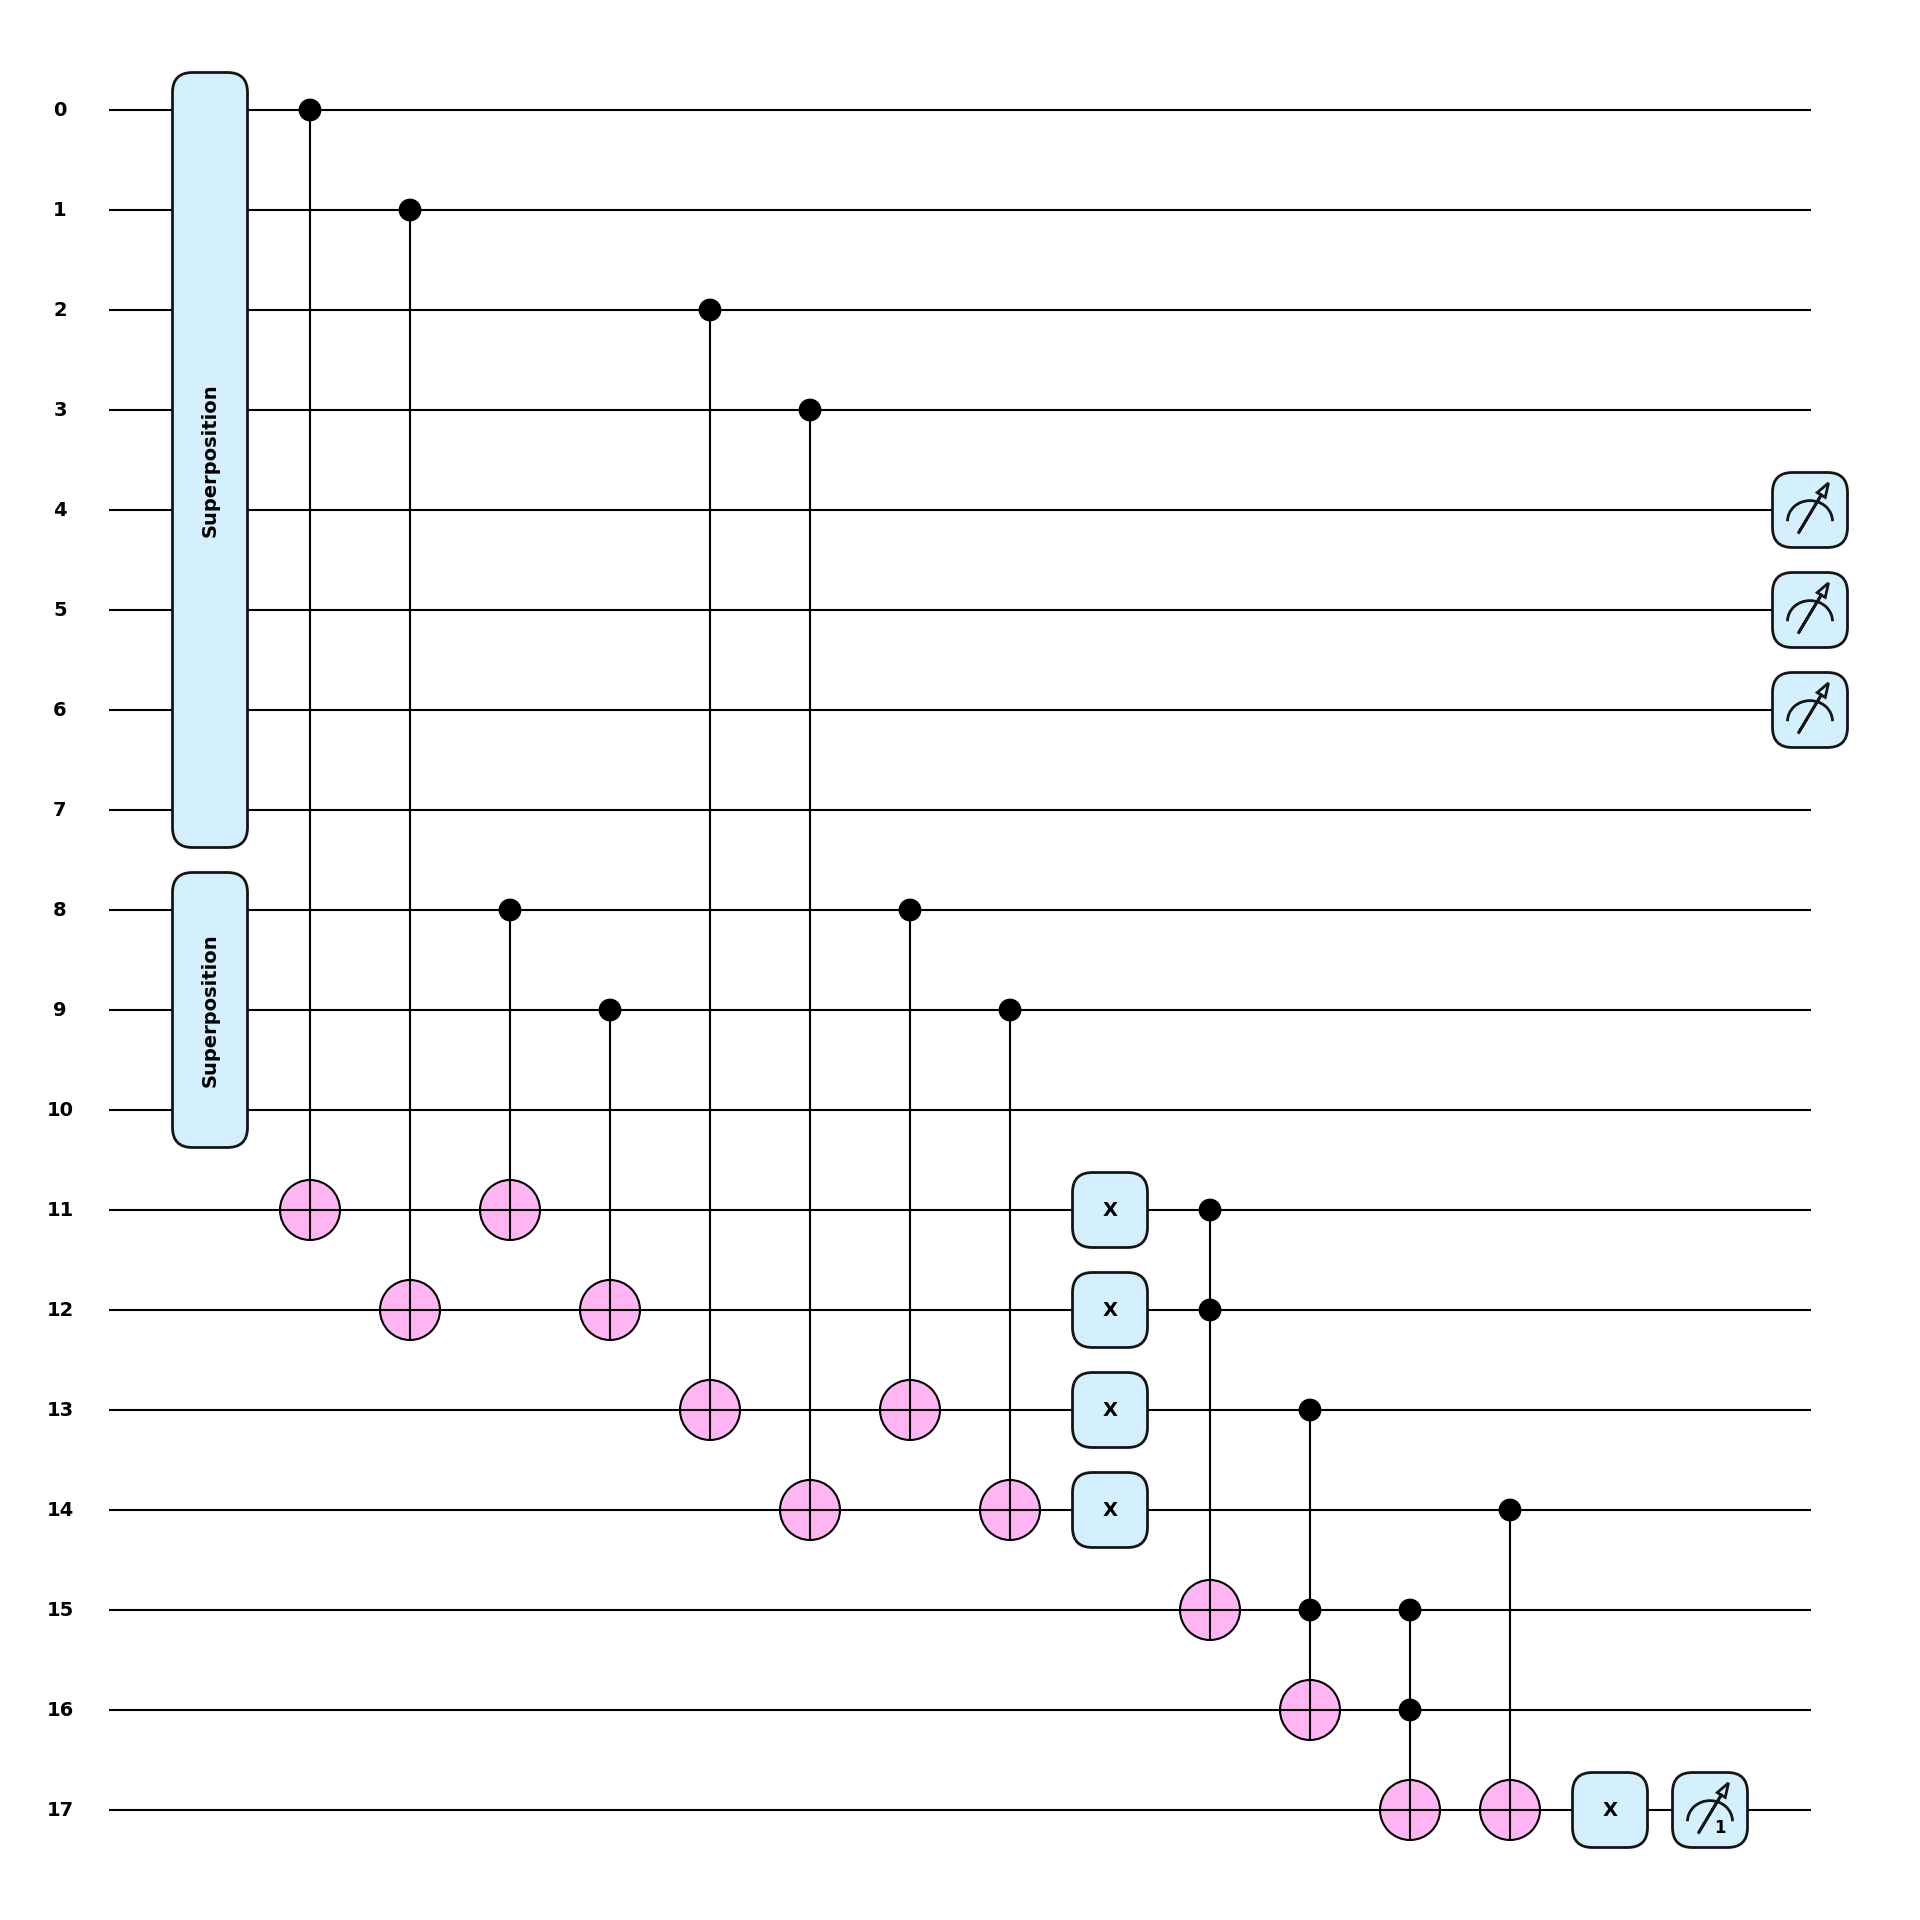

In [156]:
# read
dev = qml.device('default.qubit', wires=18)

@qml.qnode(dev)
def circuit(input):
    # input state
    coeff = np.sqrt(np.ones(len(input))/len(input))
    base = np.array(input)
    qml.Superposition(coeff, base, wires=range(7), work_wire=7)
    qml.Superposition(np.sqrt(np.ones(4)/4), [[0,0],[0,1],[1,0],[1,1]], wires=[8,9], work_wire=10)
    
    # binary summation
    qml.CNOT([0,11])
    qml.CNOT([1,12])
    qml.CNOT([8,11])
    qml.CNOT([9,12])

    qml.CNOT([2,13])
    qml.CNOT([3,14])
    qml.CNOT([8,13])
    qml.CNOT([9,14])

    qml.PauliX(11)
    qml.PauliX(12)
    qml.PauliX(13)
    qml.PauliX(14)
    
    # determination 
    qml.Toffoli([11,12,15])
    qml.Toffoli([13,15,16])
    qml.Toffoli([15,16,17])
    qml.CNOT([14,17])
    qml.PauliX(17)

    qml.measure(17, postselect=1)
    # qml.Barrier(range(21))
    # qml.ctrl(qml.Adder(1, [4,5,6], mod=2, work_wires=[19,20]), control=18)
    # qml.ctrl(qml.PauliX(4), control=18)
    # read
dev = qml.device('default.qubit', wires=18)

@qml.qnode(dev)
def circuit(input):
    # input state
    coeff = np.sqrt(np.ones(len(input))/len(input))
    base = np.array(input)
    qml.Superposition(coeff, base, wires=range(7), work_wire=7)
    qml.Superposition(np.sqrt(np.ones(4)/4), [[0,0],[0,1],[1,0],[1,1]], wires=[8,9], work_wire=10)
    
    # binary summation
    qml.CNOT([0,11])
    qml.CNOT([1,12])
    qml.CNOT([8,11])
    qml.CNOT([9,12])

    qml.CNOT([2,13])
    qml.CNOT([3,14])
    qml.CNOT([8,13])
    qml.CNOT([9,14])

    qml.PauliX(11)
    qml.PauliX(12)
    qml.PauliX(13)
    qml.PauliX(14)
    
    # determination 
    qml.Toffoli([11,12,15])
    qml.Toffoli([13,15,16])
    qml.Toffoli([15,16,17])
    qml.CNOT([14,17])
    qml.PauliX(17)

    qml.measure(17, postselect=1)
    # qml.Barrier(range(21))
    # qml.ctrl(qml.Adder(1, [4,5,6], mod=2, work_wires=[19,20]), control=18)
    # qml.ctrl(qml.PauliX(4), control=18)
    
    return qml.probs([4,5,6])

# qm = [[0,0,0,0,1,0,0],[0,0,0,1,0,0,1],[0,0,1,0,0,0,0],[0,0,1,1,0,1,0],
#      [0,1,0,0,0,1,1], [0,1,0,1,1,0,1],[0,1,1,0,0,1,0],[0,1,1,1,0,0,1],
#      [1,0,0,0,0,0,0],[1,0,0,1,0,0,1],[1,0,1,0,0,1,1],[1,0,1,1,1,0,0],
#      [1,1,0,0,0,1,0],[1,1,0,1,0,0,0],[1,1,1,0,1,0,0],[1,1,1,1,0,1,1]]

qm = [[0,0,0,0,0,0,0],[0,0,0,1,0,0,0],[0,0,1,0,0,0,0],[0,0,1,1,0,0,0],
     [0,1,0,0,0,0,0], [0,1,0,1,0,0,0],[0,1,1,0,0,0,0],[0,1,1,1,0,0,0],
     [1,0,0,0,0,0,0],[1,0,0,1,0,0,0],[1,0,1,0,0,0,0],[1,0,1,1,0,0,0],
     [1,1,0,0,0,0,0],[1,1,0,1,0,0,0],[1,1,1,0,0,0,0],[1,1,1,1,0,0,0]]

fig, _ = qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)(qm)
plt.show()
    return qml.probs([4,5,6])

# qm = [[0,0,0,0,1,0,0],[0,0,0,1,0,0,1],[0,0,1,0,0,0,0],[0,0,1,1,0,1,0],
#      [0,1,0,0,0,1,1], [0,1,0,1,1,0,1],[0,1,1,0,0,1,0],[0,1,1,1,0,0,1],
#      [1,0,0,0,0,0,0],[1,0,0,1,0,0,1],[1,0,1,0,0,1,1],[1,0,1,1,1,0,0],
#      [1,1,0,0,0,1,0],[1,1,0,1,0,0,0],[1,1,1,0,1,0,0],[1,1,1,1,0,1,1]]

qm = [[0,0,0,0,0,0,0],[0,0,0,1,0,0,0],[0,0,1,0,0,0,0],[0,0,1,1,0,0,0],
     [0,1,0,0,0,0,0], [0,1,0,1,0,0,0],[0,1,1,0,0,0,0],[0,1,1,1,0,0,0],
     [1,0,0,0,0,0,0],[1,0,0,1,0,0,0],[1,0,1,0,0,0,0],[1,0,1,1,0,0,0],
     [1,1,0,0,0,0,0],[1,1,0,1,0,0,0],[1,1,1,0,0,0,0],[1,1,1,1,0,0,0]]

fig, _ = qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)(qm)
plt.show()

In [157]:
circuit(qm)

array([1., 0., 0., 0., 0., 0., 0., 0.])

In [158]:
fig.savefig('trace.png')

In [159]:
[f"{x:0{3}b}" for x in range(8)]

['000', '001', '010', '011', '100', '101', '110', '111']

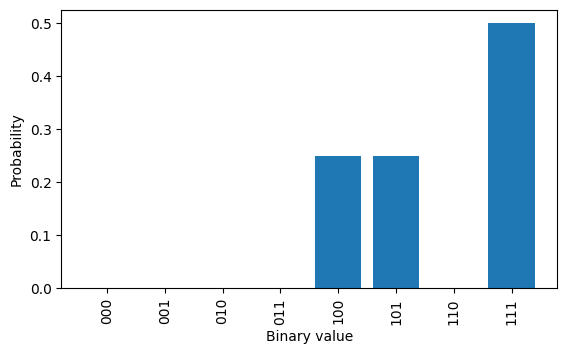

In [160]:
# probability plot
bit_strings = [f"{x:0{3}b}" for x in range(8)]
# indices = [i for i in range(32) if f"{i:05b}".endswith("00")]
c = [0,0,0,0,0.25,0.25,0,0.5]

plt.bar(bit_strings,c)
plt.xlabel("Binary value")
plt.ylabel("Probability")
plt.xticks(rotation="vertical")
plt.subplots_adjust(bottom=0.3)

plt.show()

Matplotlib is building the font cache; this may take a moment.


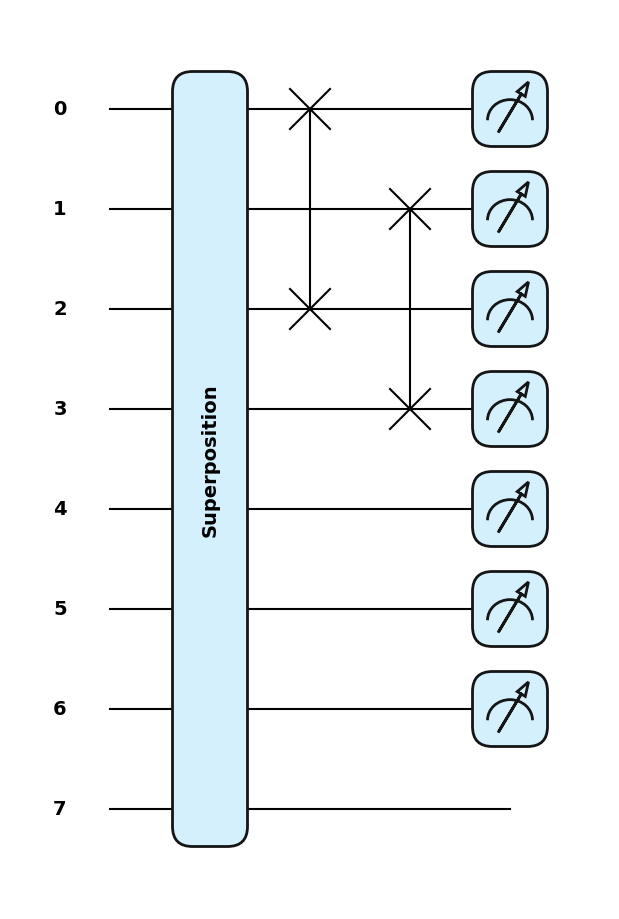

In [251]:
# read
dev = qml.device('default.qubit', wires=8)

@qml.qnode(dev)
def circuit(input):
    # input state
    coeff = np.sqrt(np.ones(len(input))/len(input))
    base = np.array(input)
    qml.Superposition(coeff, base, wires=range(7), work_wire=7)

    qml.SWAP([0,2])
    qml.SWAP([1,3])
    
    return qml.probs(range(7))

qm = [[0,0,0,0,1,0,0],[0,0,0,1,0,0,1],[0,0,1,0,0,0,0],[0,0,1,1,0,1,0],
     [0,1,0,0,0,1,1], [0,1,0,1,1,0,1],[0,1,1,0,0,1,0],[0,1,1,1,0,0,1],
     [1,0,0,0,0,0,0],[1,0,0,1,0,0,1],[1,0,1,0,0,1,1],[1,0,1,1,1,0,0],
     [1,1,0,0,0,1,0],[1,1,0,1,0,0,0],[1,1,1,0,1,0,0],[1,1,1,1,0,1,1]]

fig, _ = qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)(qm)
plt.show()

In [ ]:
fig.savefig('transpose.png')

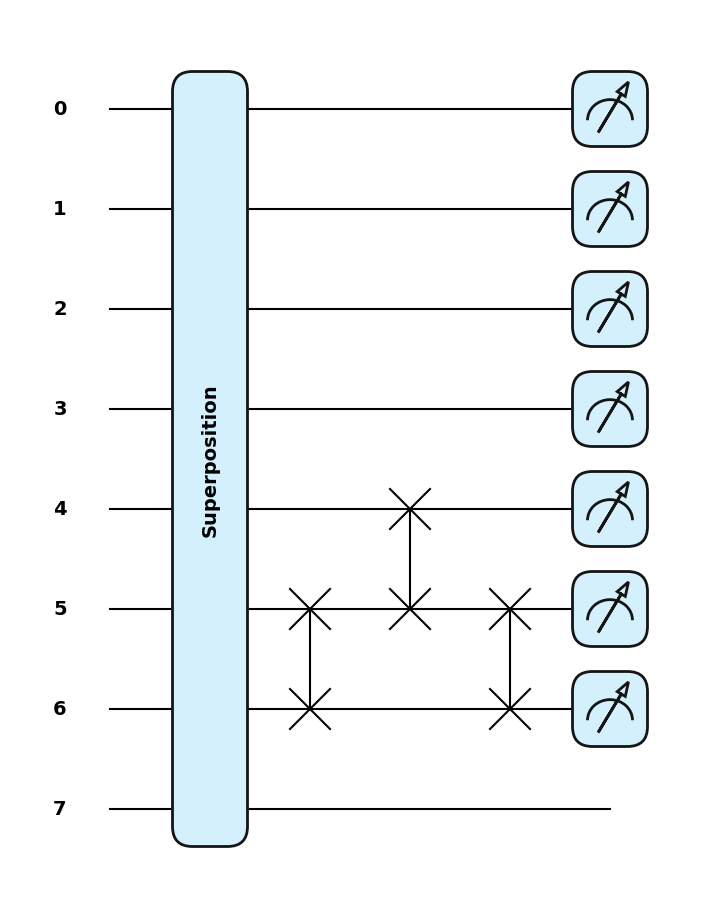

In [252]:
# read
dev = qml.device('default.qubit', wires=8)

@qml.qnode(dev)
def circuit(input):
    # input state
    coeff = np.sqrt(np.ones(len(input))/len(input))
    base = np.array(input)
    qml.Superposition(coeff, base, wires=range(7), work_wire=7)

    qml.SWAP([5,6])
    qml.SWAP([4,5])
    qml.SWAP([5,6])
    
    return qml.probs(range(7))

qm = [[0,0,0,0,1,0,0],[0,0,0,1,0,0,1],[0,0,1,0,0,0,0],[0,0,1,1,0,1,0],
     [0,1,0,0,0,1,1], [0,1,0,1,1,0,1],[0,1,1,0,0,1,0],[0,1,1,1,0,0,1],
     [1,0,0,0,0,0,0],[1,0,0,1,0,0,1],[1,0,1,0,0,1,1],[1,0,1,1,1,0,0],
     [1,1,0,0,0,1,0],[1,1,0,1,0,0,0],[1,1,1,0,1,0,0],[1,1,1,1,0,1,1]]

fig, _ = qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)(qm)
plt.show()

In [253]:
fig.savefig('transpose_value.png')

In [250]:
non_zero_columns = []

df_org = pd.DataFrame(circuit(qm).reshape(16,-1))
df_org['Row'] = [f"{x:0{4}b}" for x in range(16)]
df_org = df_org.set_index('Row')
df_org = df_org.rename(columns=dict(zip(range(8),[f"{x:0{3}b}" for x in range(8)])))
print(df_org)

for index, row in df_org.iterrows():
    non_zero_cols = row[row != 0].index.tolist()  # Extract column names where values are non-zero
    non_zero_columns.append(non_zero_cols)

non_zero_columns = np.array(non_zero_columns).reshape(4,4)
print(non_zero_columns)

df = pd.DataFrame(non_zero_columns)
df['Row'] = [f"{x:0{2}b}" for x in range(4)]
df = df.set_index('Row')
df = df.rename(columns=dict(zip(range(8),[f"{x:0{2}b}" for x in range(4)])))
def toBinary(x):
    return int('0b'+x)
df = df.apply(toBinary)
sns.heatmap(df, annot=True, cmap='BuPu')
plt.xlabel('Column')
plt.show()

         000     001     010     011     100     101  110  111
Row                                                           
0000  0.0000  0.0000  0.0000  0.0000  0.0625  0.0000  0.0  0.0
0001  0.0000  0.0000  0.0000  0.0625  0.0000  0.0000  0.0  0.0
0010  0.0625  0.0000  0.0000  0.0000  0.0000  0.0000  0.0  0.0
0011  0.0000  0.0000  0.0625  0.0000  0.0000  0.0000  0.0  0.0
0100  0.0000  0.0625  0.0000  0.0000  0.0000  0.0000  0.0  0.0
0101  0.0000  0.0000  0.0000  0.0000  0.0000  0.0625  0.0  0.0
0110  0.0000  0.0625  0.0000  0.0000  0.0000  0.0000  0.0  0.0
0111  0.0625  0.0000  0.0000  0.0000  0.0000  0.0000  0.0  0.0
1000  0.0625  0.0000  0.0000  0.0000  0.0000  0.0000  0.0  0.0
1001  0.0000  0.0000  0.0625  0.0000  0.0000  0.0000  0.0  0.0
1010  0.0000  0.0000  0.0000  0.0625  0.0000  0.0000  0.0  0.0
1011  0.0000  0.0000  0.0000  0.0000  0.0625  0.0000  0.0  0.0
1100  0.0000  0.0000  0.0625  0.0000  0.0000  0.0000  0.0  0.0
1101  0.0000  0.0625  0.0000  0.0000  0.0000  0.0000  0

TypeError: cannot convert the series to <class 'int'>

In [163]:
fig.savefig('transpose.png')

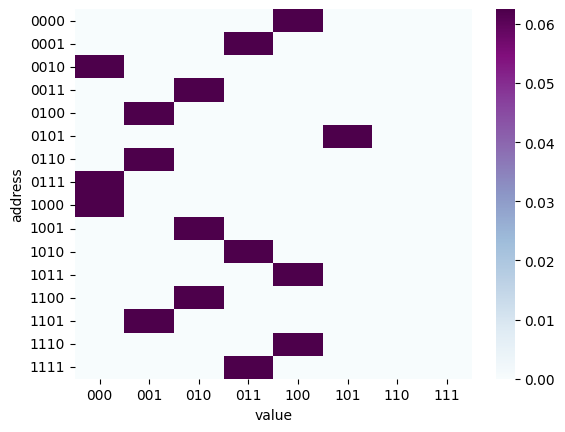

In [171]:
df = pd.DataFrame(circuit(qm).reshape(16,-1))
df['address'] = [f"{x:0{4}b}" for x in range(16)]
df = df.set_index('address')
df = df.rename(columns=dict(zip(range(8),[f"{x:0{3}b}" for x in range(8)])))
sns.heatmap(df, cmap='BuPu')
plt.xlabel('value')
plt.savefig('matrix')
plt.show()

In [ ]:
qm = [[0,0,0,0,0,0,0],[0,0,0,1,0,0,0],[0,0,1,0,0,0,0],[0,0,1,1,0,0,0],
     [0,1,0,0,0,0,0], [0,1,0,1,0,0,0],[0,1,1,0,0,0,0],[0,1,1,1,0,0,0],
     [1,0,0,0,0,0,0],[1,0,0,1,0,0,0],[1,0,1,0,0,0,0],[1,0,1,1,0,0,0],
     [1,1,0,0,0,0,0],[1,1,0,1,0,0,0],[1,1,1,0,0,0,0],[1,1,1,1,0,0,0]]

In [167]:
int('0b100',2)

4

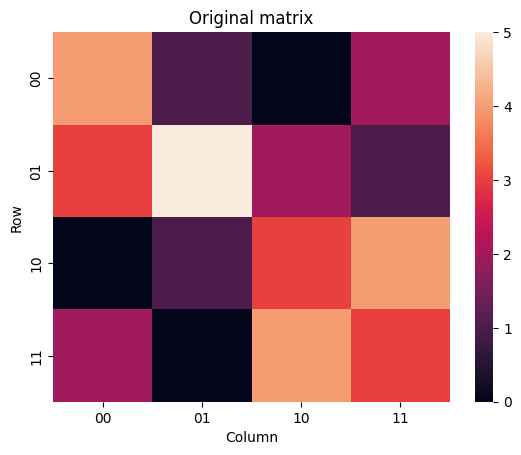

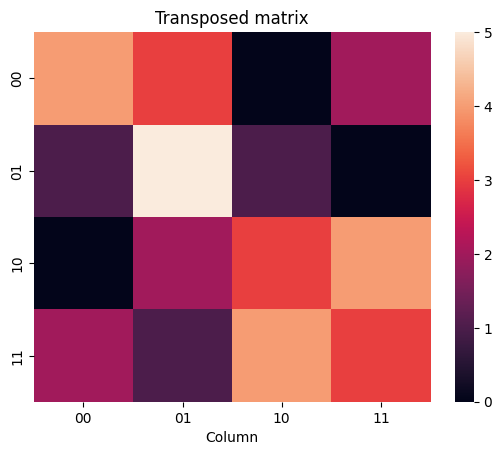

In [264]:
qm = [[0,0,0,0,1,0,0],[0,0,0,1,0,0,1],[0,0,1,0,0,0,0],[0,0,1,1,0,1,0],
     [0,1,0,0,0,1,1], [0,1,0,1,1,0,1],[0,1,1,0,0,1,0],[0,1,1,1,0,0,1],
     [1,0,0,0,0,0,0],[1,0,0,1,0,0,1],[1,0,1,0,0,1,1],[1,0,1,1,1,0,0],
     [1,1,0,0,0,1,0],[1,1,0,1,0,0,0],[1,1,1,0,1,0,0],[1,1,1,1,0,1,1]]

# Extract the last three digits and convert to binary format
binary_list = [int(''.join(map(str, row[-3:])), 2) for row in qm]
binary_list = np.array(binary_list).reshape(4,4)
df = pd.DataFrame(binary_list)
df['Row'] = [f"{x:0{2}b}" for x in range(4)]
df = df.rename(columns=dict(zip(range(8),[f"{x:0{2}b}" for x in range(4)])))
df = df.set_index('Row')
sns.heatmap(df)
plt.xlabel('Column')
plt.title('Original matrix')
plt.show()

transposed_df = df.transpose()
sns.heatmap(transposed_df)
plt.xlabel('Column')
plt.title('Transposed matrix')
plt.show()

In [212]:
np.array(["".join(map(str, row[-3:])) for row in qm]).reshape(4,4).tolist()

[['100', '001', '000', '010'],
 ['011', '101', '010', '001'],
 ['000', '001', '011', '100'],
 ['010', '000', '100', '011']]

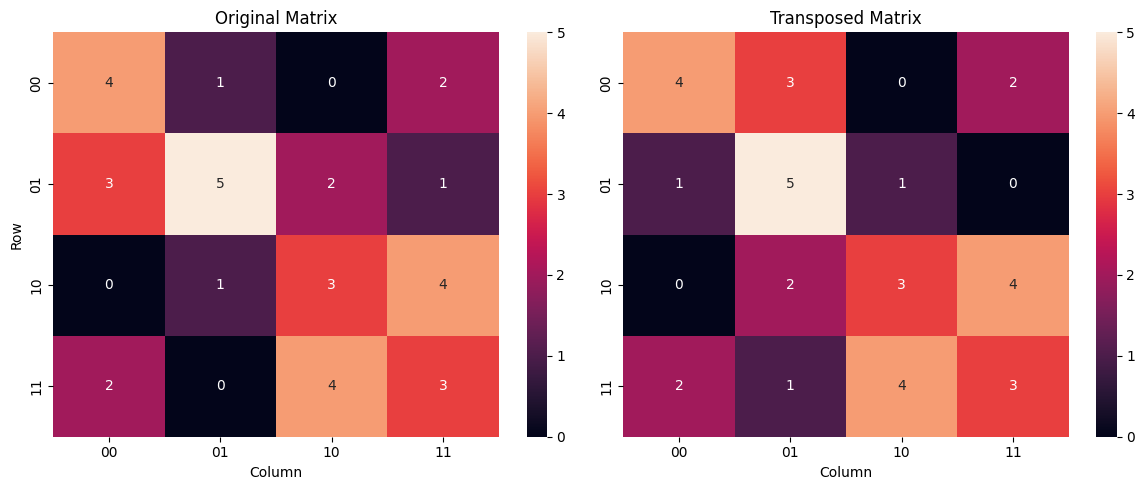

In [214]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

txt1 = np.array(["".join(map(str, row[-3:])) for row in qm])
txt1 = txt1.reshape(4,4)
txt2 = txt1.T

# Plot the original matrix
sns.heatmap(df, annot=True, ax=axes[0], )
axes[0].set_xlabel('Column')
axes[0].set_title('Original Matrix')

# Plot the transposed matrix
sns.heatmap(df.T, annot=True, ax=axes[1], )  # `.T` is equivalent to `.transpose()`
axes[1].set_xlabel('Column')
axes[1].set_title('Transposed Matrix')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

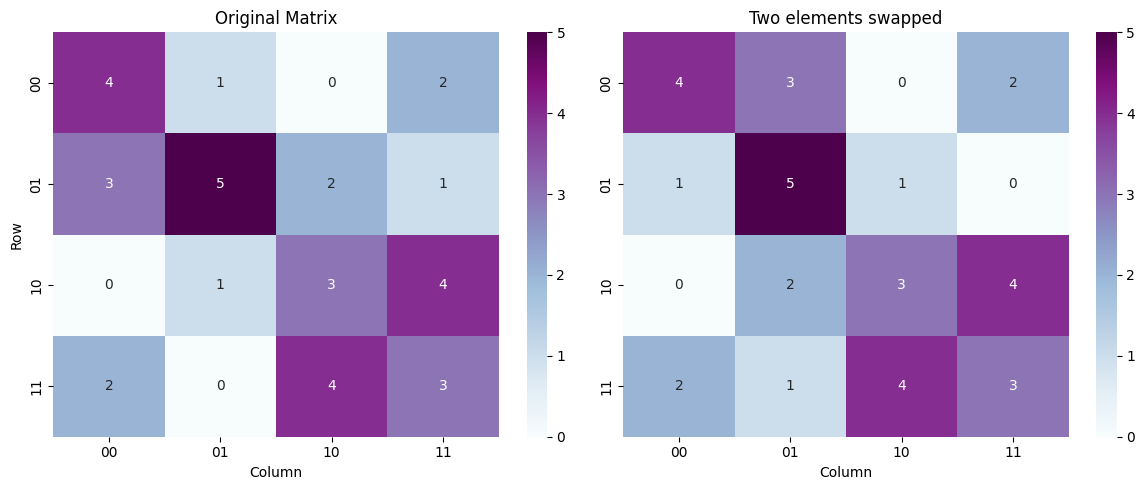

In [265]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

txt1 = np.array(["".join(map(str, row[-3:])) for row in qm])
txt1 = txt1.reshape(4,4)
txt2 = txt1.T
txt2[0][1] = '001'
txt2[1][0] = '011'


# Plot the original matrix
sns.heatmap(df, annot=True, ax=axes[0], cmap='BuPu')
axes[0].set_xlabel('Column')
axes[0].set_title('Original Matrix')

# Plot the transposed matrix
sns.heatmap(df.T, annot=True, ax=axes[1], cmap='BuPu')  # `.T` is equivalent to `.transpose()`
axes[1].set_xlabel('Column')
axes[1].set_title('Two elements swapped')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [258]:
txt2

array([['100', '011', '000', '010'],
       ['001', '101', '001', '000'],
       ['000', '010', '011', '100'],
       ['010', '001', '100', '011']], dtype='<U3')

In [262]:
txt2[0][1] = '001'
txt2[1][0] = '011'
txt2

array([['100', '001', '000', '010'],
       ['011', '101', '001', '000'],
       ['000', '010', '011', '100'],
       ['010', '001', '100', '011']], dtype='<U3')

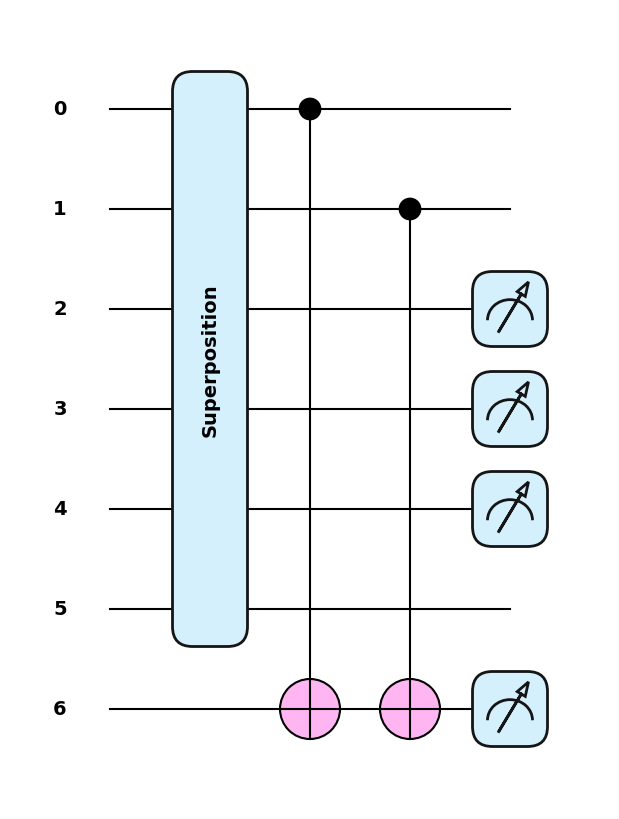

[0.   0.   0.   0.25 0.5  0.   0.   0.25 0.   0.   0.   0.   0.   0.
 0.   0.  ]


In [312]:
# read
dev = qml.device('default.qubit', wires=7)

@qml.qnode(dev)
def circuit(input):
    # input state
    coeff = np.sqrt(np.ones(len(input))/len(input))
    base = np.array(input)
    qml.Superposition(coeff, base, wires=range(5), work_wire=5)

    # binary summation
    qml.CNOT([0,6])
    qml.CNOT([1,6])

    # qml.measure(2)
    # qml.measure(6)

    # qml.ctrl(qml.Multiplier(1, [3,4,5], 2, work_wires=[8,9,10,11,12]), control=7)
    # qml.CNOT([7,2])
    # qml.PauliX(7)

    # qml.ctrl(qml.Multiplier(1, [3,4,5], 2, work_wires=[8,9,10,11,12]), control=7)
    # qml.CSWAP([7,0,1])
    # qml.Barrier(range(18))
    
    return qml.probs([2,3,4,6])

qm = [[0,0,0,1,0], [0,1,0,0,1], [1,0,0,1,1], [1,1,0,1,0]]

fig, _ = qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)(qm)
plt.show()

print(circuit(qm))

In [313]:
binary_array = [f"{x:04b}" for x in range(16)]
bin0 = [i for i, val in enumerate(binary_array) if val.endswith("0")]
bin1 = [i for i, val in enumerate(binary_array) if val.endswith("1")]

print("Indices ending in 0:", bin0)
print("Indices ending in 1:", bin1)

Indices ending in 0: [0, 2, 4, 6, 8, 10, 12, 14]
Indices ending in 1: [1, 3, 5, 7, 9, 11, 13, 15]


In [314]:
color = []
for i in range(8):
    color.append('green')
for i in range(8):
    color.append('orange')

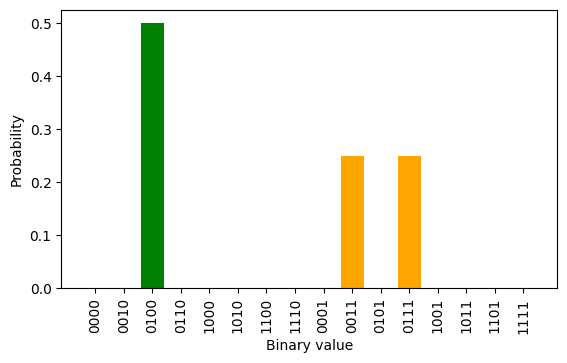

In [315]:
# probability plot
bit_strings = [f"{x:0{4}b}" for x in range(16)]
bit_strings_plot = []

c = circuit(qm)
c_plot = []

for i in bin0:
    bit_strings_plot.append(bit_strings[i])
    c_plot.append(c[i])

for i in bin1:
    bit_strings_plot.append(bit_strings[i])
    c_plot.append(c[i])

plt.bar(bit_strings_plot,c_plot, color=color)
plt.xlabel("Binary value")
plt.ylabel("Probability")
plt.xticks(rotation="vertical")
plt.subplots_adjust(bottom=0.3)
plt.show()

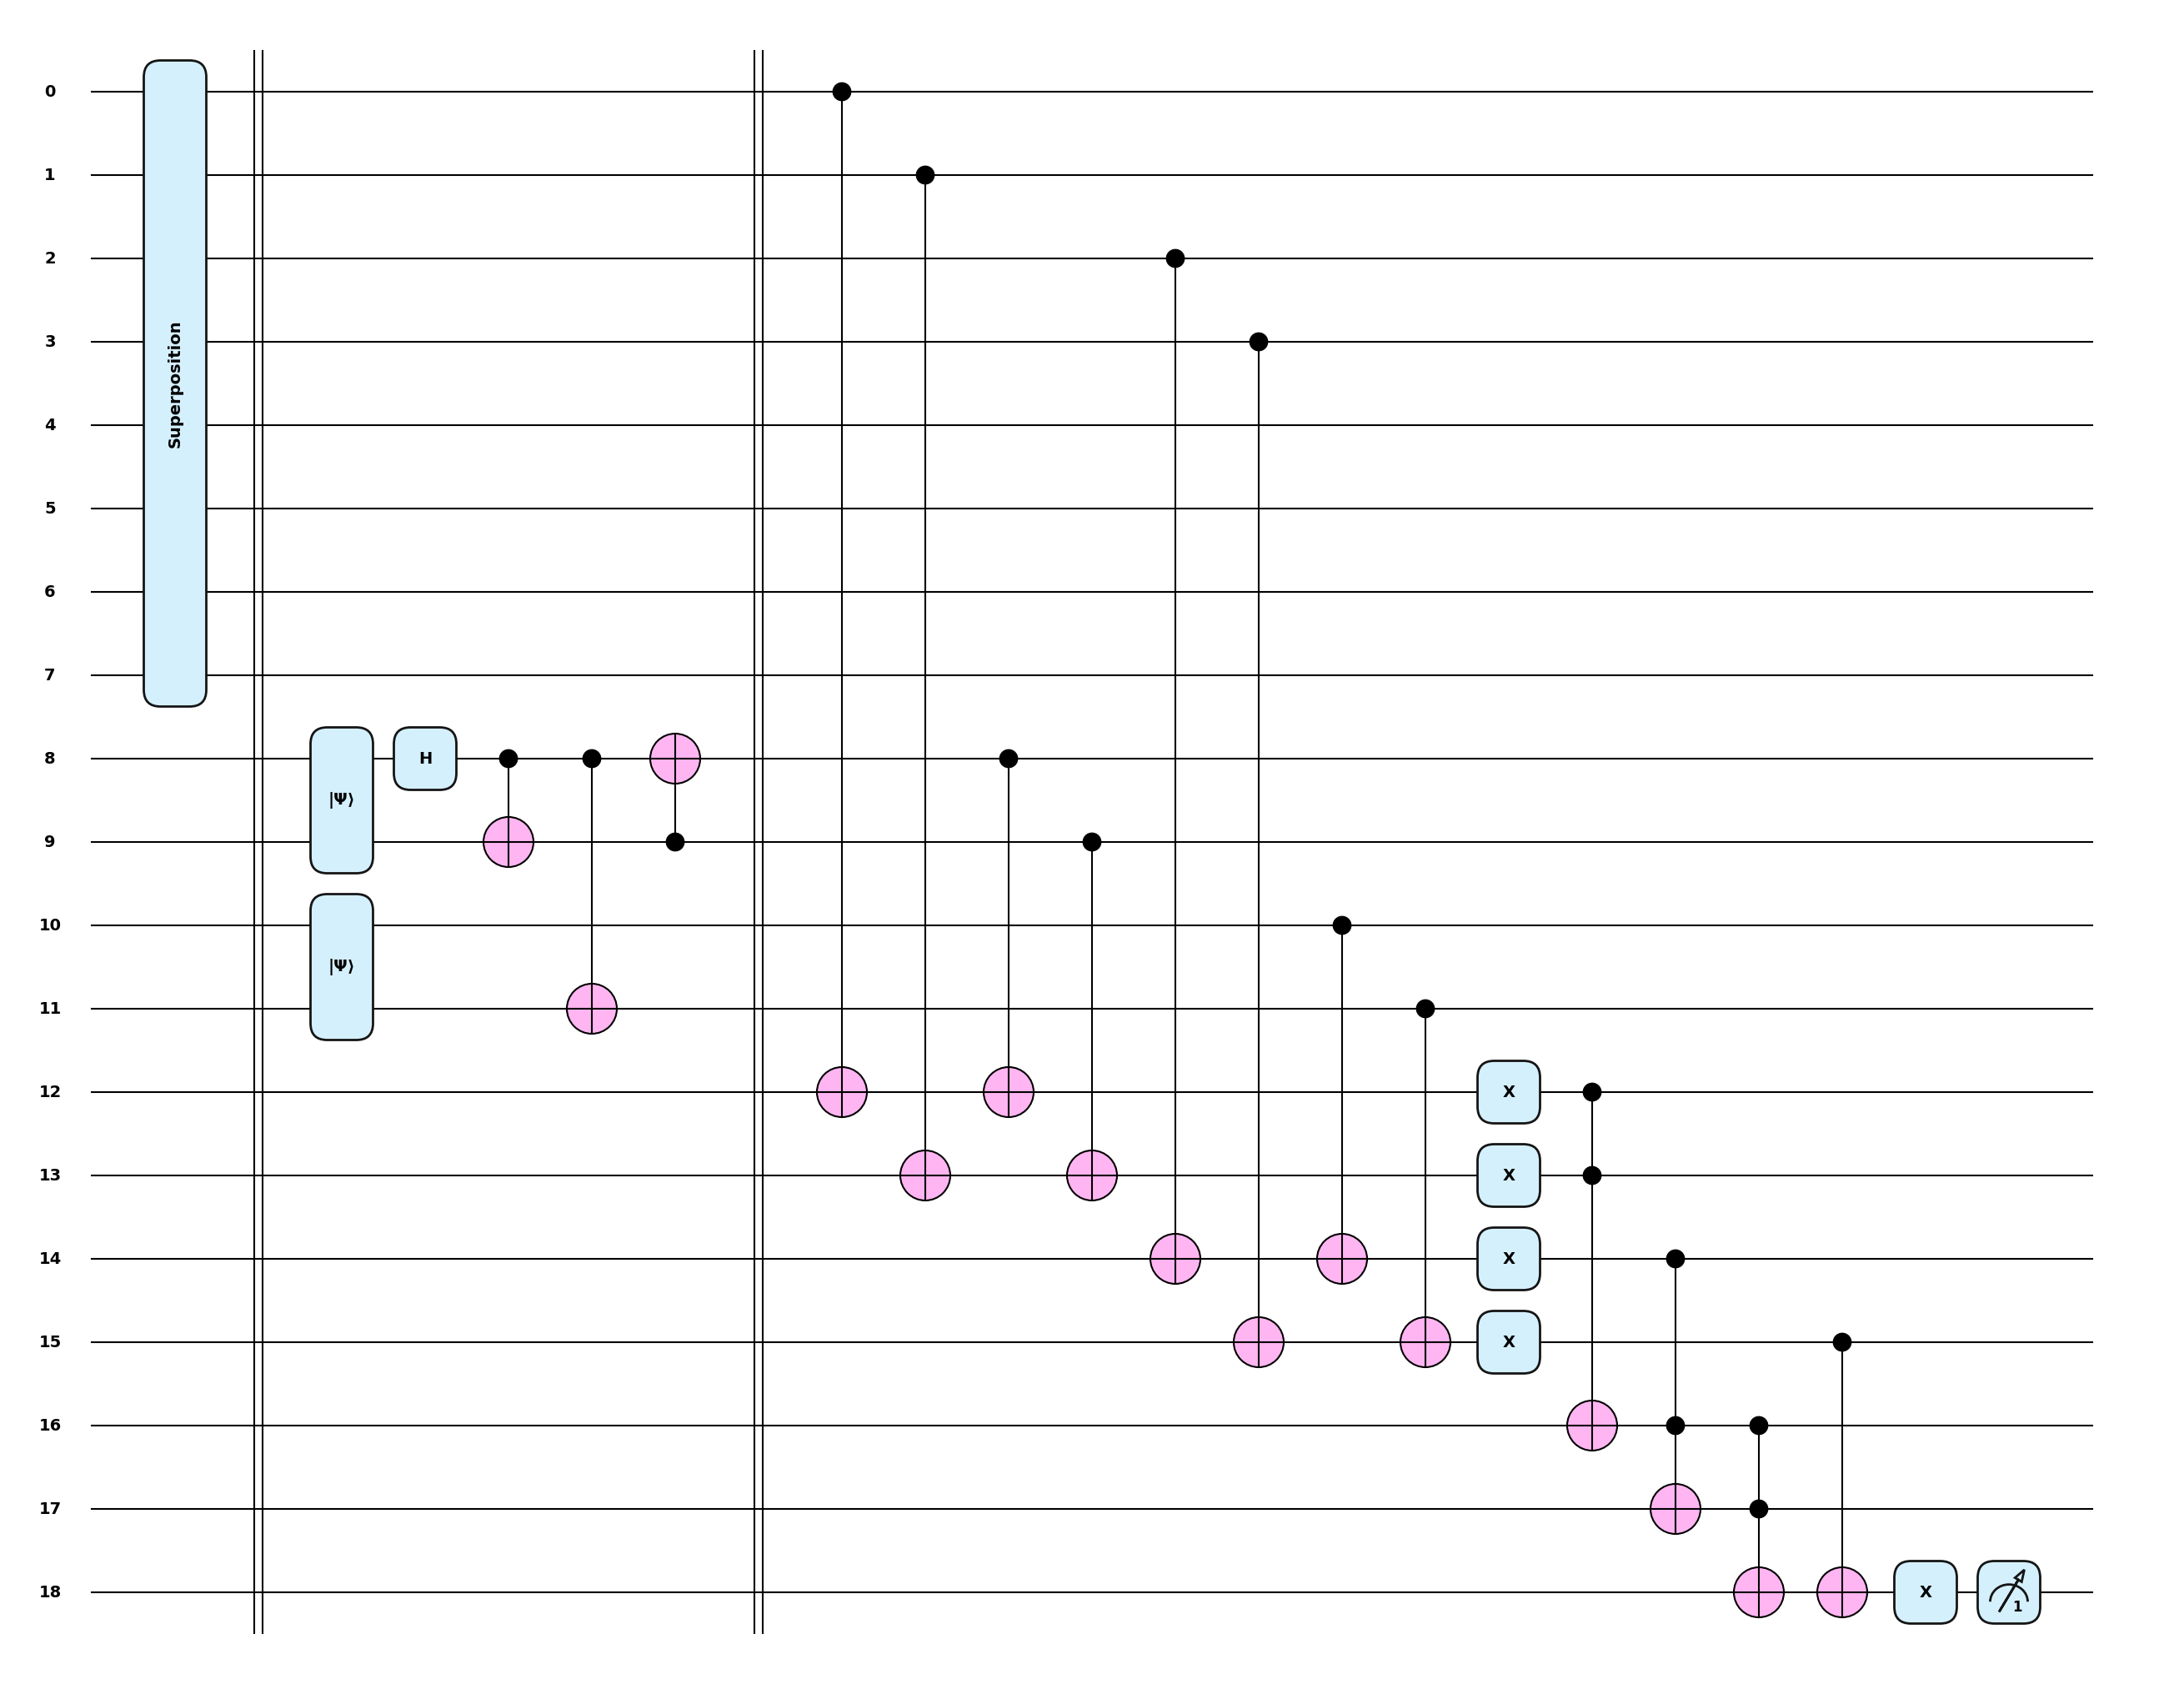

In [320]:
# read
dev = qml.device('default.qubit', wires=19)

@qml.qnode(dev)
def circuit(input):
    # input state
    coeff = np.sqrt(np.ones(len(input))/len(input))
    base = np.array(input)
    qml.Superposition(coeff, base, wires=range(7), work_wire=7)
    
    qml.Barrier(range(19))
    qml.BasisState(np.array([0,0]), wires=[8,9])
    qml.BasisState(np.array([0,1]), wires=[10,11])

    # create a superpostion
    # qml.Barrier(range(19))
    qml.Hadamard(8)
    qml.CNOT([8,9])
    qml.CNOT([8,11])
    qml.CNOT([9,8])
    qml.Barrier(range(19))
    
    # binary summation
    qml.CNOT([0,12])
    qml.CNOT([1,13])
    qml.CNOT([8,12])
    qml.CNOT([9,13])

    qml.CNOT([2,14])
    qml.CNOT([3,15])
    qml.CNOT([10,14])
    qml.CNOT([11,15])

    qml.PauliX(12)
    qml.PauliX(13)
    qml.PauliX(14)
    qml.PauliX(15)
    
    # determination 
    qml.Toffoli([12,13,16])
    qml.Toffoli([14,16,17])
    qml.Toffoli([16,17,18])
    qml.CNOT([15,18])
    qml.PauliX(18)

    qml.measure(18, postselect=1)
    # qml.Barrier(range(21))
    # qml.ctrl(qml.Adder(1, [4,5,6], mod=2, work_wires=[19,20]), control=18)
    # qml.ctrl(qml.PauliX(4), control=18)


qm = [[0,0,0,0,0,0,0],[0,0,0,1,0,0,0],[0,0,1,0,0,0,0],[0,0,1,1,0,0,0],
     [0,1,0,0,0,0,0], [0,1,0,1,0,0,0],[0,1,1,0,0,0,0],[0,1,1,1,0,0,0],
     [1,0,0,0,0,0,0],[1,0,0,1,0,0,0],[1,0,1,0,0,0,0],[1,0,1,1,0,0,0],
     [1,1,0,0,0,0,0],[1,1,0,1,0,0,0],[1,1,1,0,0,0,0],[1,1,1,1,0,0,0]]

fig, _ = qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)(qm)
plt.show()

In [321]:
fig.savefig('transpose2.png')